<a href="https://colab.research.google.com/github/samer-glitch/TADP-Enhancing-Trustworthiness-in-Federated-Learning-Through-Provenance-Driven-Governance/blob/main/TADP_illustrations_based_on_implemented_experiements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

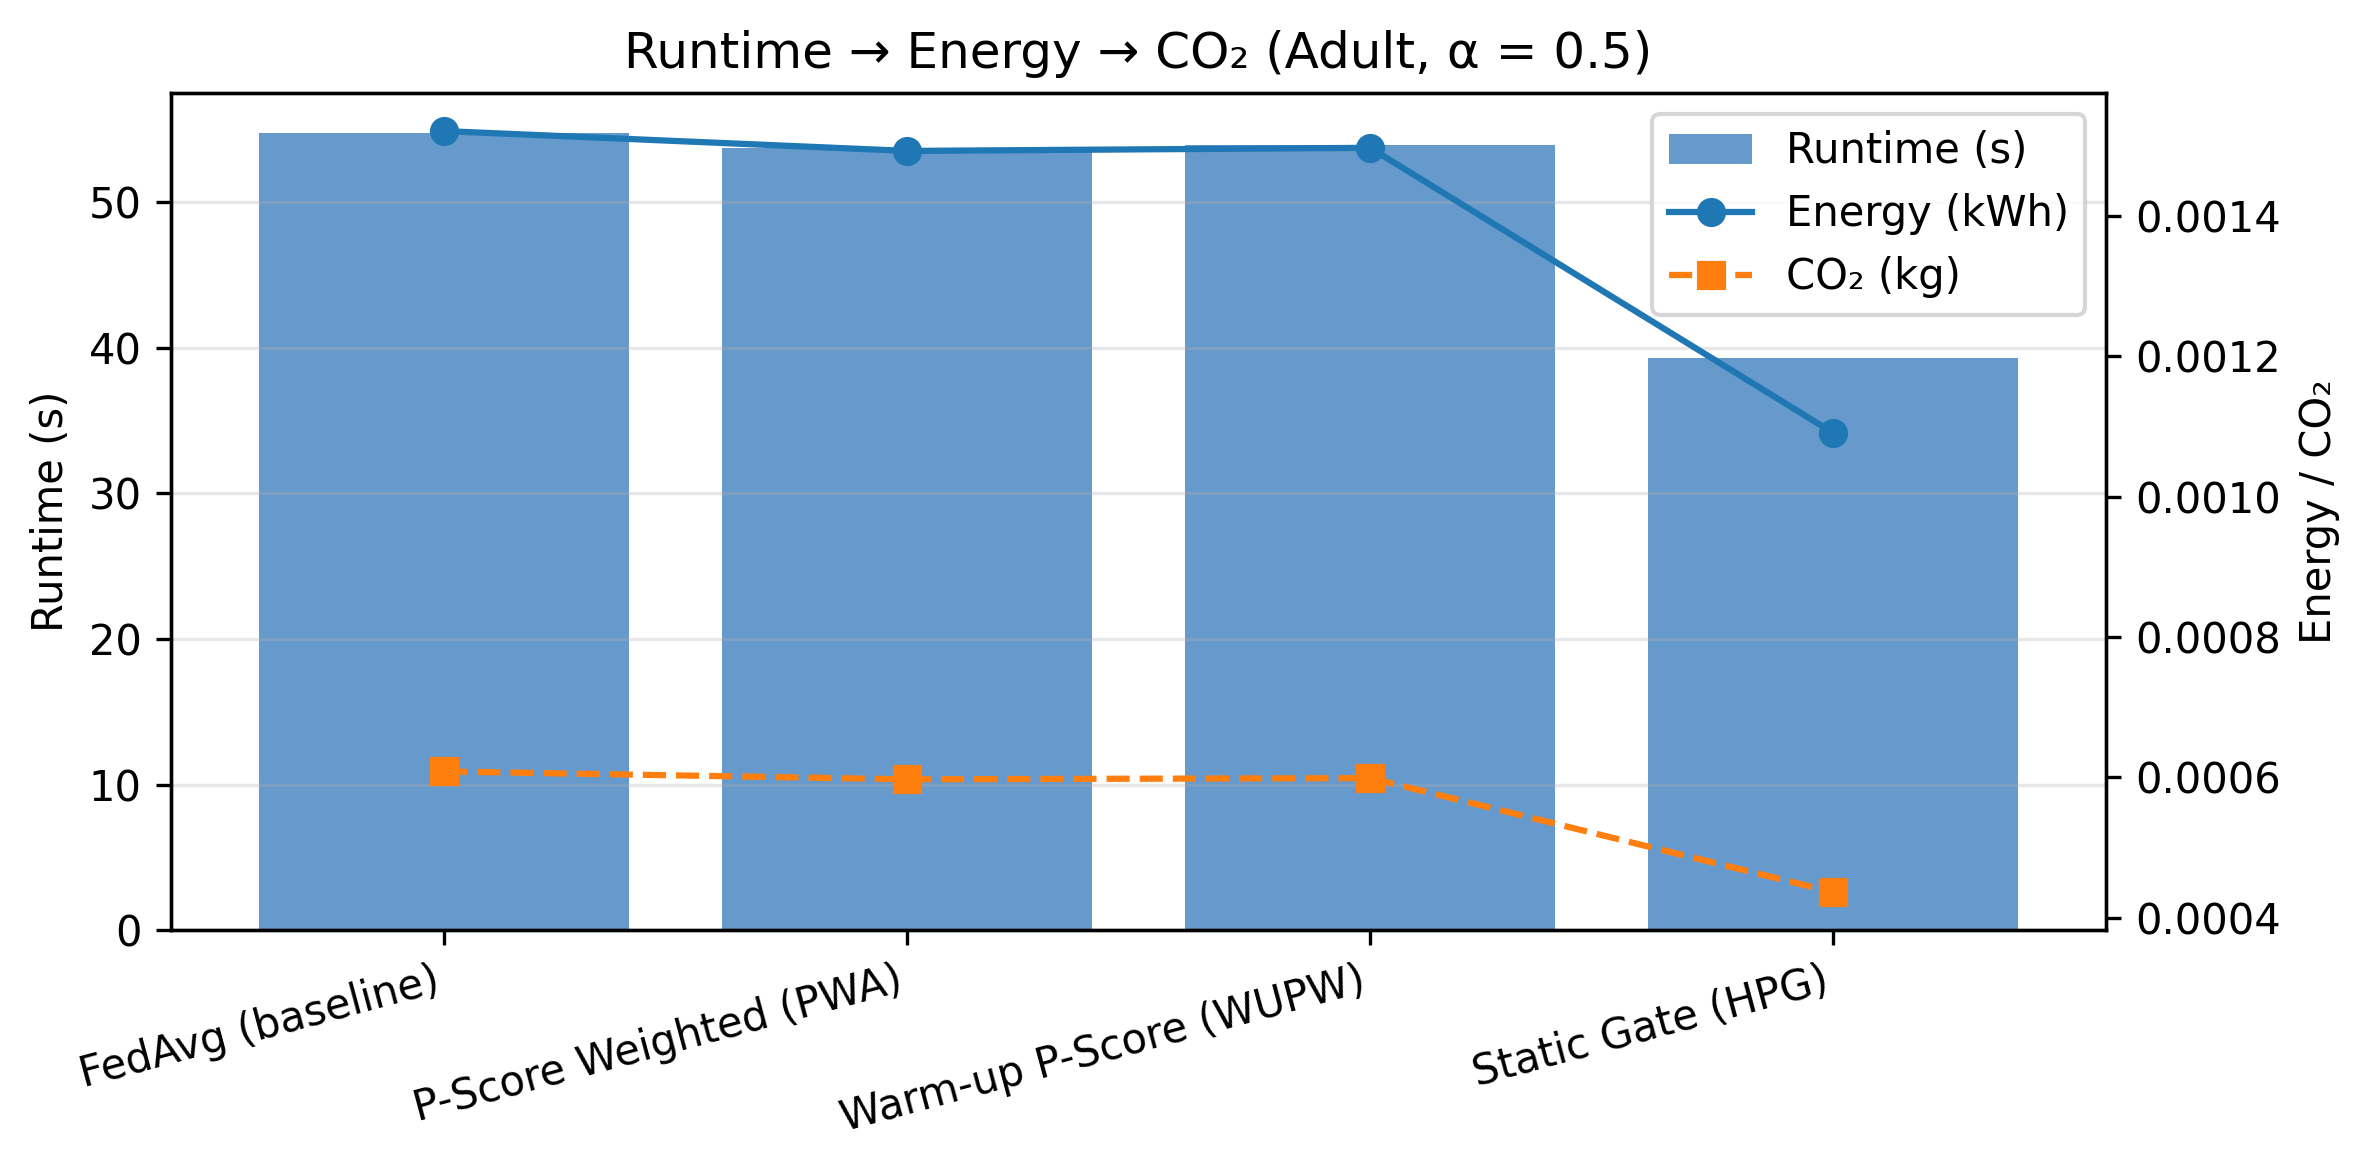

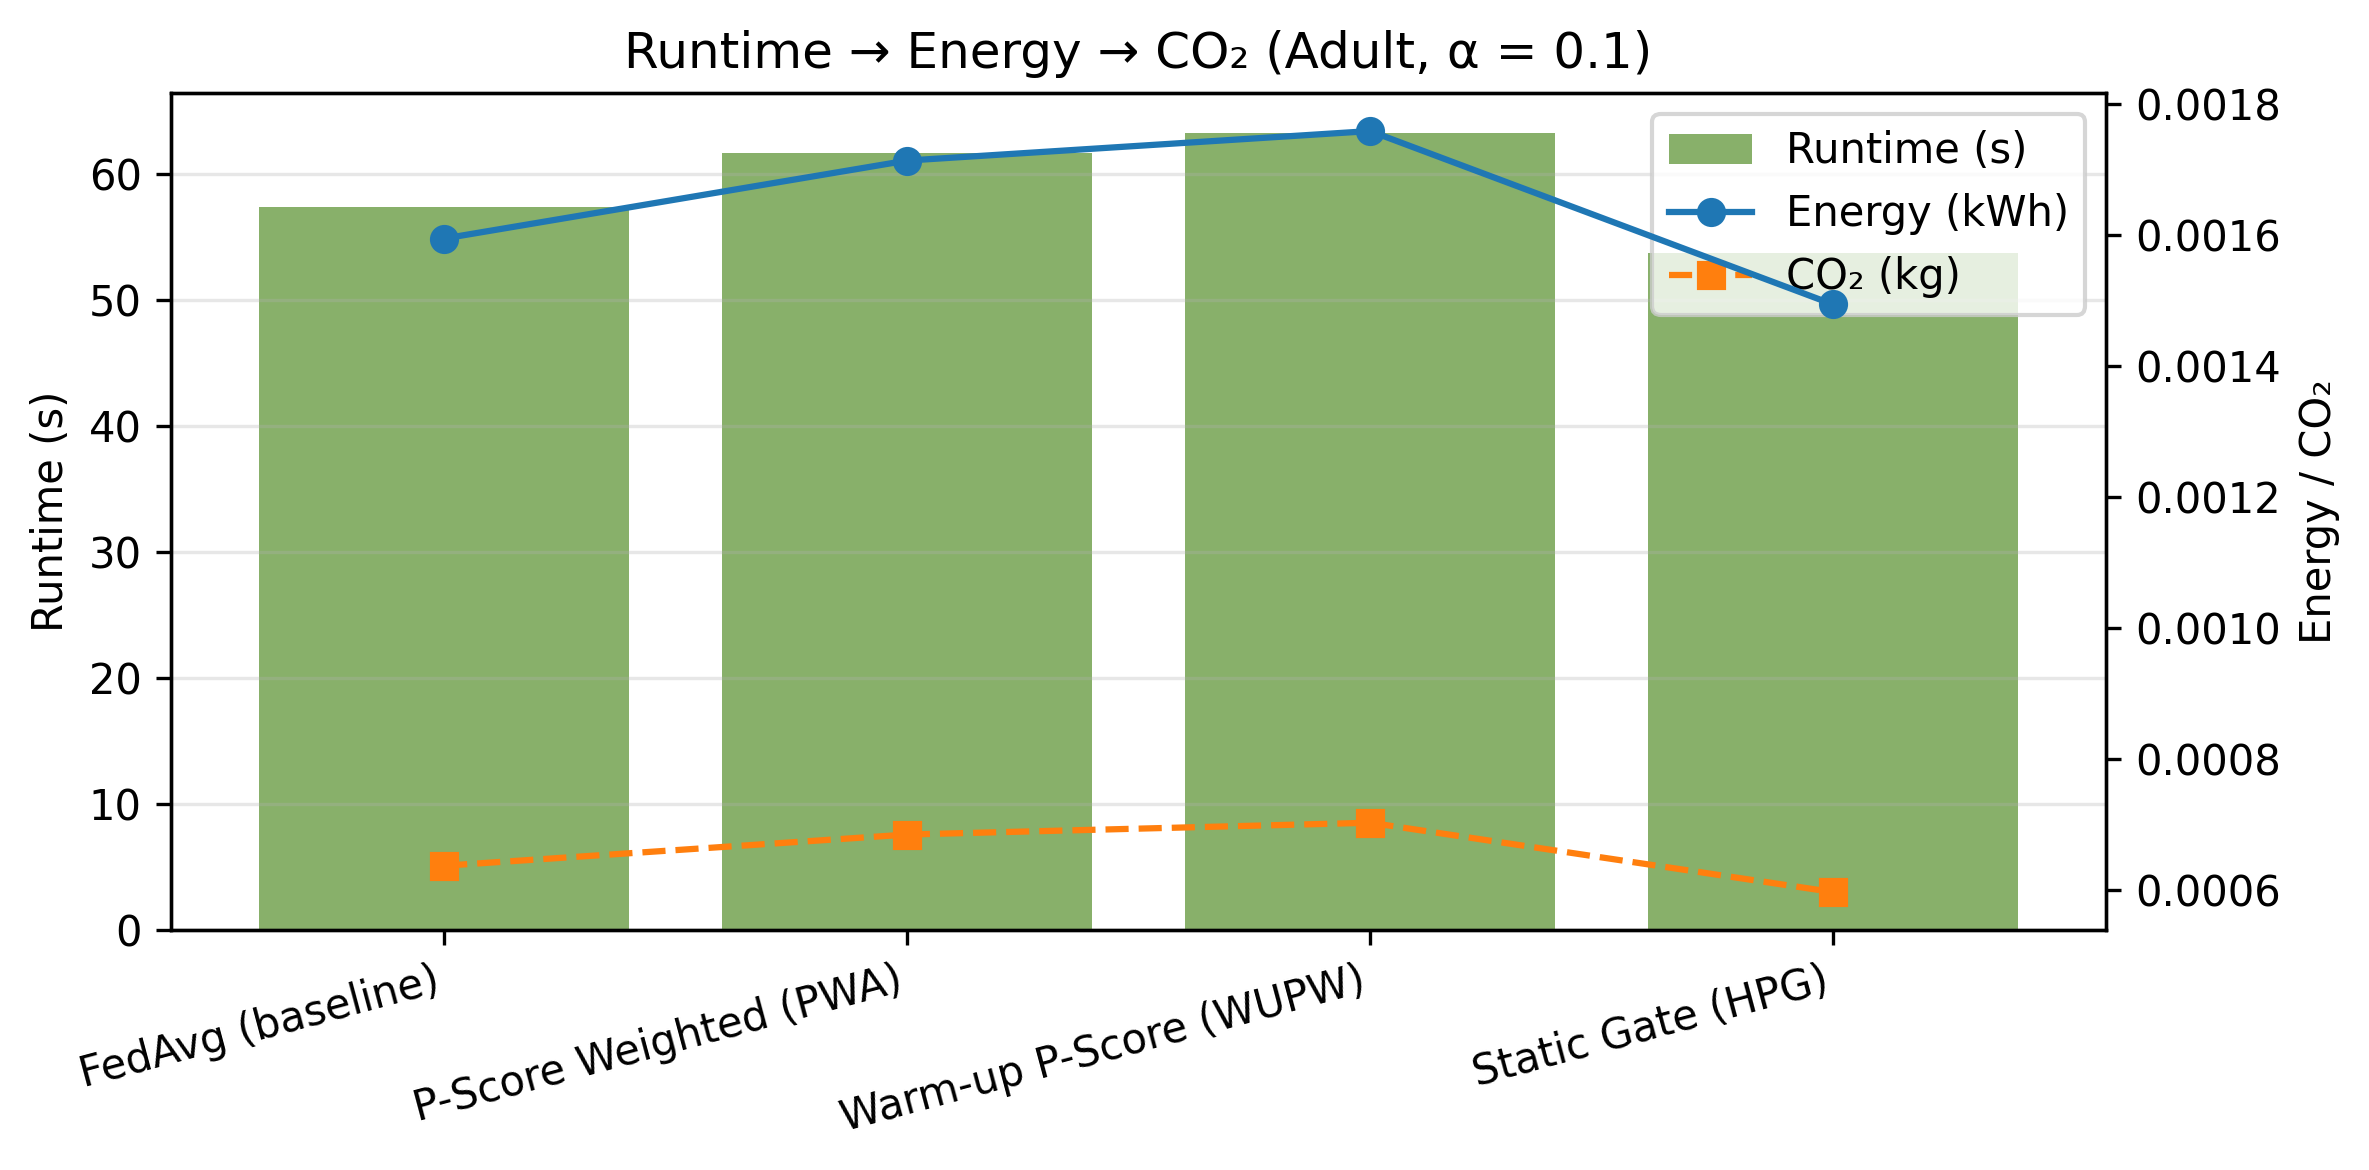

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Global style: 300 dpi
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

# ---------------------------
# Shared method labels
# ---------------------------
methods_short = ["FedAvg", "PWA", "WUPW", "HPG"]
methods_long  = [
    "FedAvg (baseline)",
    "P-Score Weighted (PWA)",
    "Warm-up P-Score (WUPW)",
    "Static Gate (HPG)"
]

x = np.arange(len(methods_short))

power_kw = 0.1  # assumed device power for energy estimation


# =======================
# Figure 1: Adult α = 0.5
# =======================
time_s_05 = np.array([54.75, 53.73, 53.89, 39.27])  # runtimes from Table α=0.5

energy_05 = power_kw * (time_s_05 / 3600.0)
co2_05    = 0.4 * energy_05

fig, ax1 = plt.subplots(figsize=(8, 4))
bars = ax1.bar(x, time_s_05, color="#6699cc")  # Original blue color
ax1.set_xticks(x)
ax1.set_xticklabels(methods_long, rotation=15, ha="right")
ax1.set_ylabel("Runtime (s)")
ax1.set_title("Runtime → Energy → CO₂ (Adult, α = 0.5)")
ax1.grid(axis="y", alpha=0.3)

ax2 = ax1.twinx()
ln1, = ax2.plot(x, energy_05, marker="o", label="Energy (kWh)")
ln2, = ax2.plot(x, co2_05, marker="s", linestyle="--", label="CO₂ (kg)")
ax2.set_ylabel("Energy / CO₂")

handles = [bars, ln1, ln2]
labels  = ["Runtime (s)", "Energy (kWh)", "CO₂ (kg)"]
ax1.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.savefig("fig_runtime_energy_co2_a05.png")  # or .pdf for LaTeX
plt.show()


# =======================
# Figure 2: Adult α = 0.1
# =======================
time_s_01 = np.array([57.39, 61.67, 63.29, 53.77])  # runtimes from Table α=0.1

energy_01 = power_kw * (time_s_01 / 3600.0)
co2_01    = 0.4 * energy_01

fig, ax1 = plt.subplots(figsize=(8, 4))
bars = ax1.bar(x, time_s_01, color="#88b06a")  # Original green color
ax1.set_xticks(x)
ax1.set_xticklabels(methods_long, rotation=15, ha="right")
ax1.set_ylabel("Runtime (s)")
ax1.set_title("Runtime → Energy → CO₂ (Adult, α = 0.1)")
ax1.grid(axis="y", alpha=0.3)

ax2 = ax1.twinx()
ln1, = ax2.plot(x, energy_01, marker="o", label="Energy (kWh)")
ln2, = ax2.plot(x, co2_01, marker="s", linestyle="--", label="CO₂ (kg)")
ax2.set_ylabel("Energy / CO₂")

handles = [bars, ln1, ln2]
labels  = ["Runtime (s)", "Energy (kWh)", "CO₂ (kg)"]
ax1.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.savefig("fig_runtime_energy_co2_a01.png")  # or .pdf for LaTeX
plt.show()

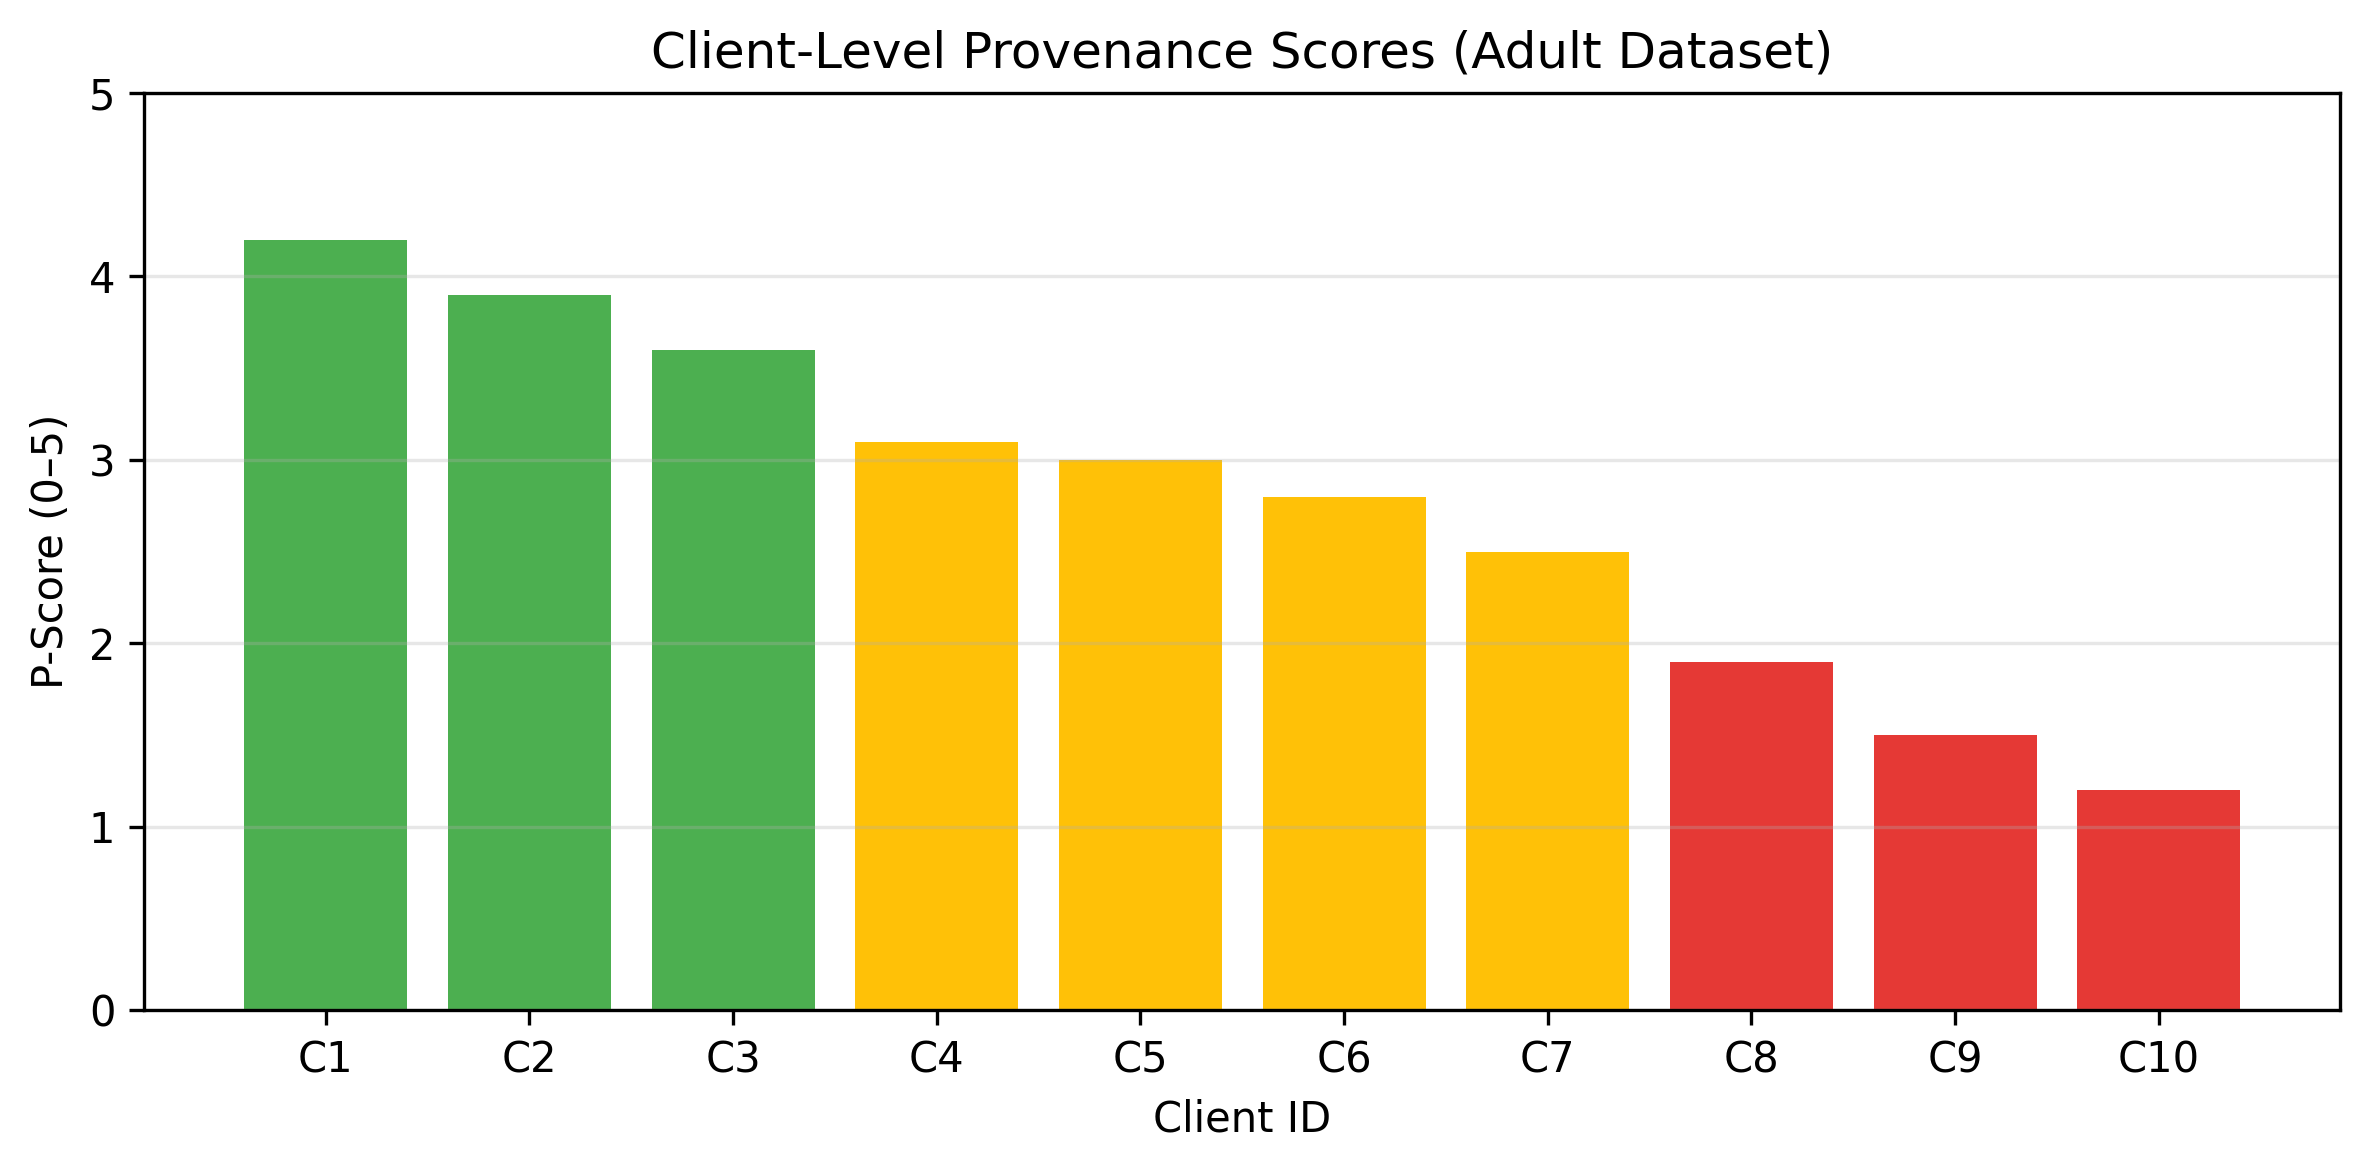

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

# Synthetic example consistent with your paper:
# High = [3.5–5], Medium = [2.5–3.5], Low = [0–2.5]
client_ids = np.array(["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"])
pscores = np.array([4.2, 3.9, 3.6, 3.1, 3.0, 2.8, 2.5, 1.9, 1.5, 1.2])

colors = ["#4CAF50" if p>=3.5 else "#FFC107" if p>=2.5 else "#E53935" for p in pscores]

plt.figure(figsize=(8,4))
plt.bar(client_ids, pscores, color=colors)
plt.ylim(0,5)
plt.ylabel("P-Score (0–5)")
plt.xlabel("Client ID")
plt.title("Client-Level Provenance Scores (Adult Dataset)")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("fig_pscore_distribution.png")
plt.show()


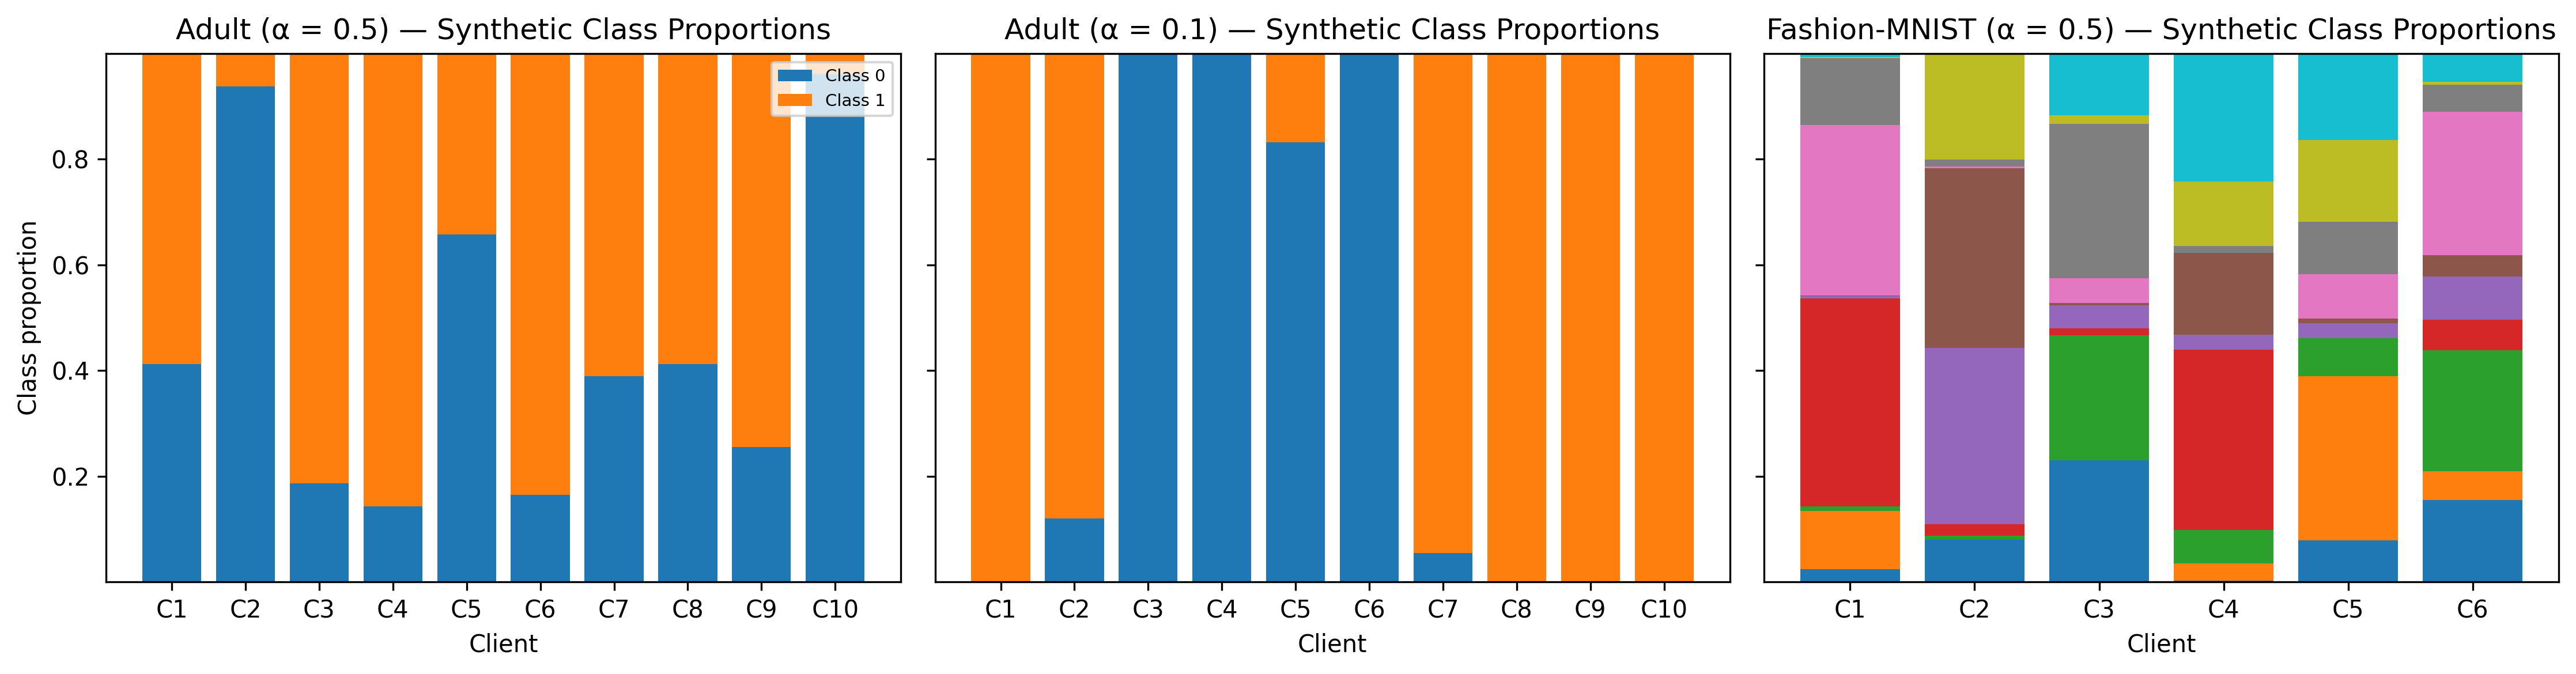

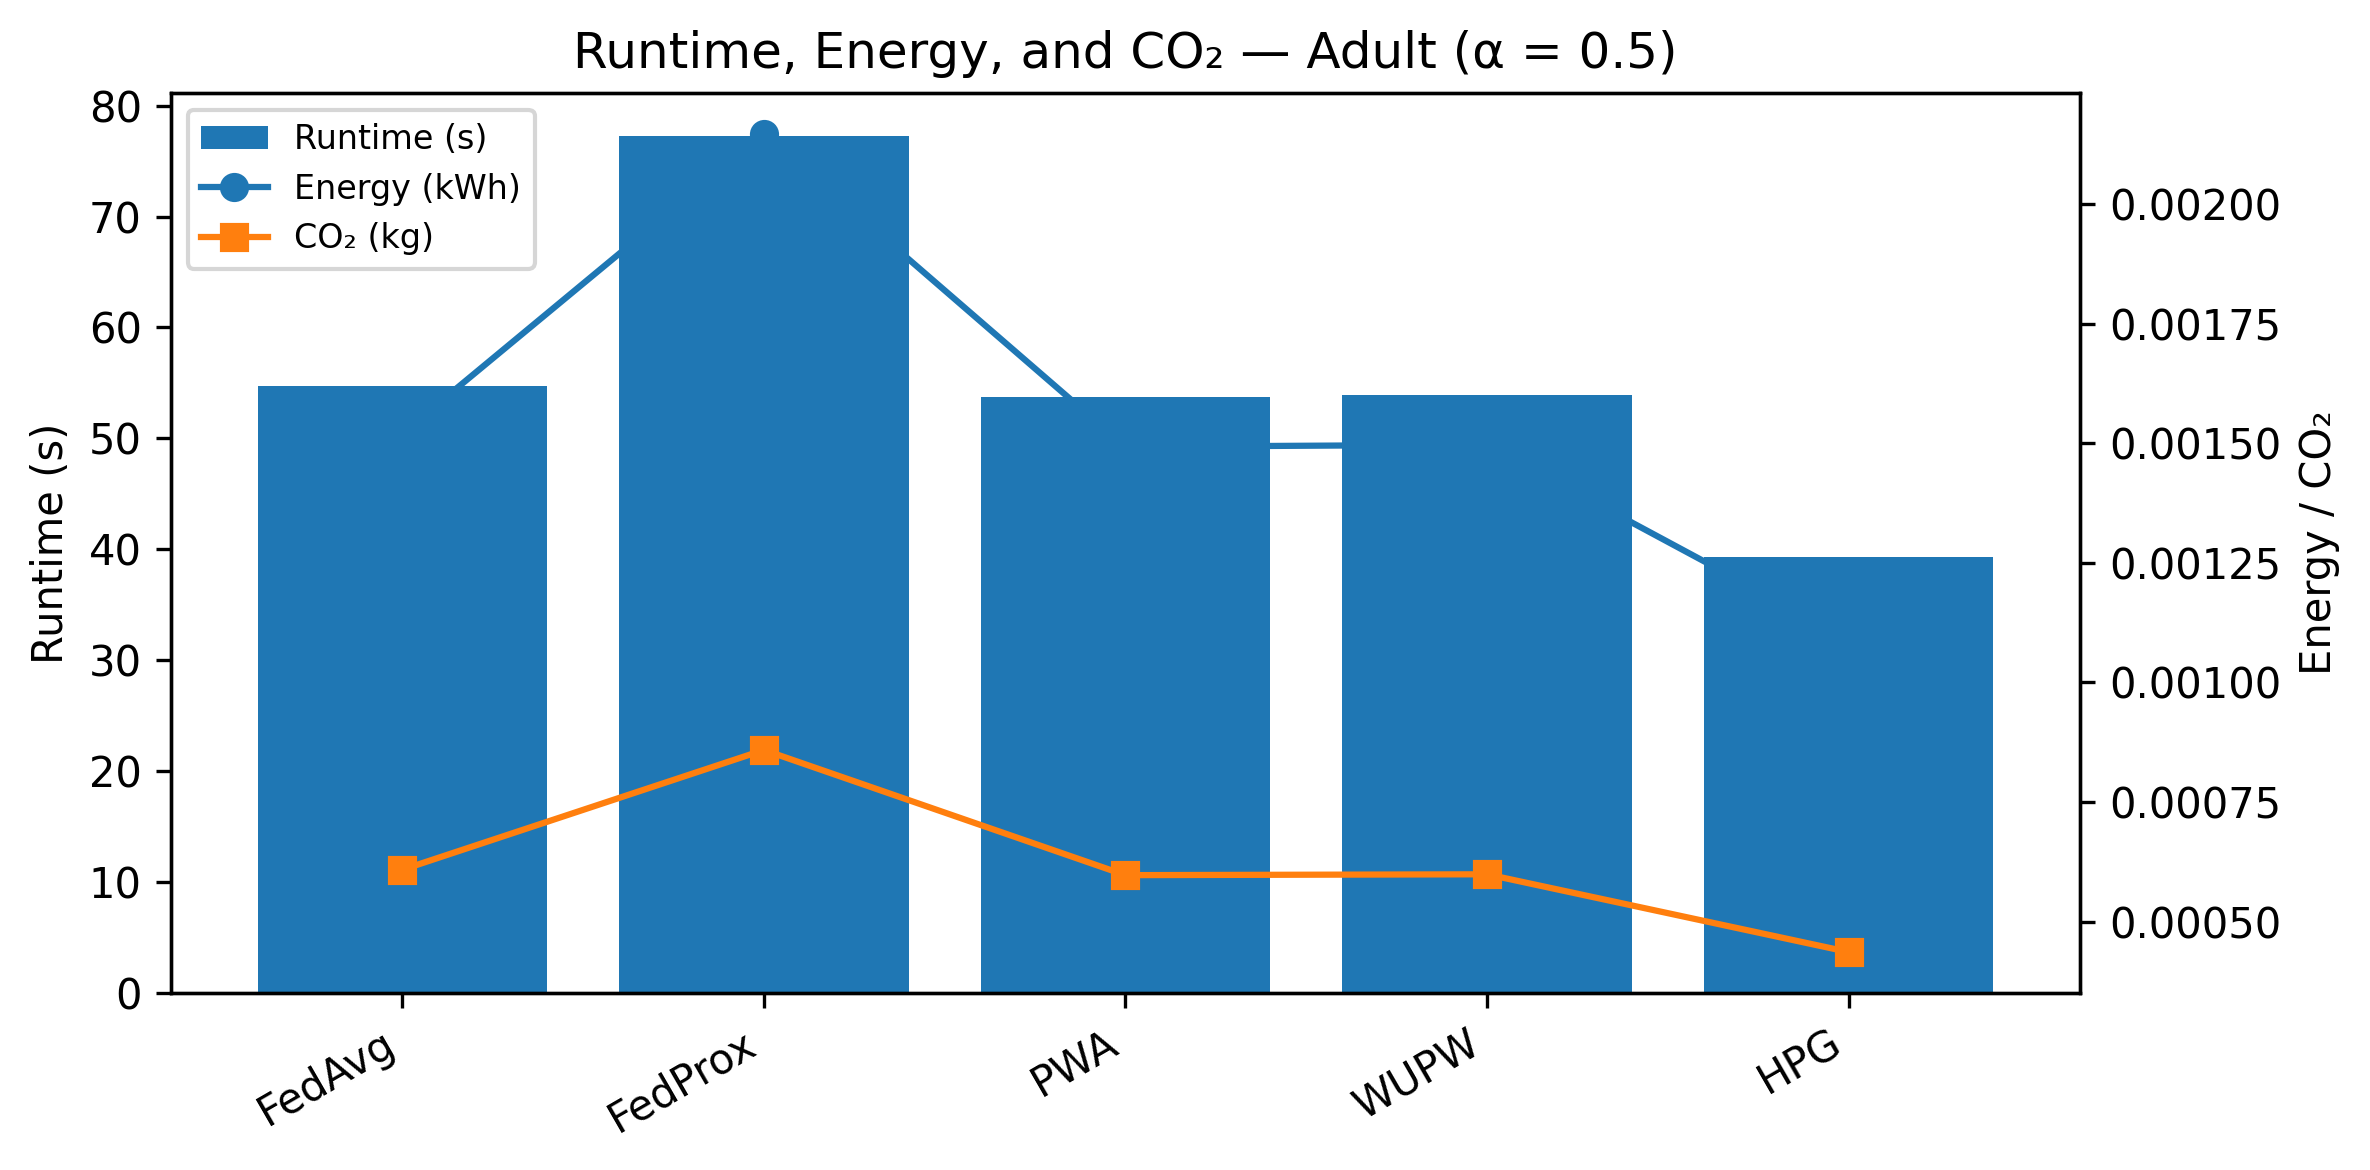

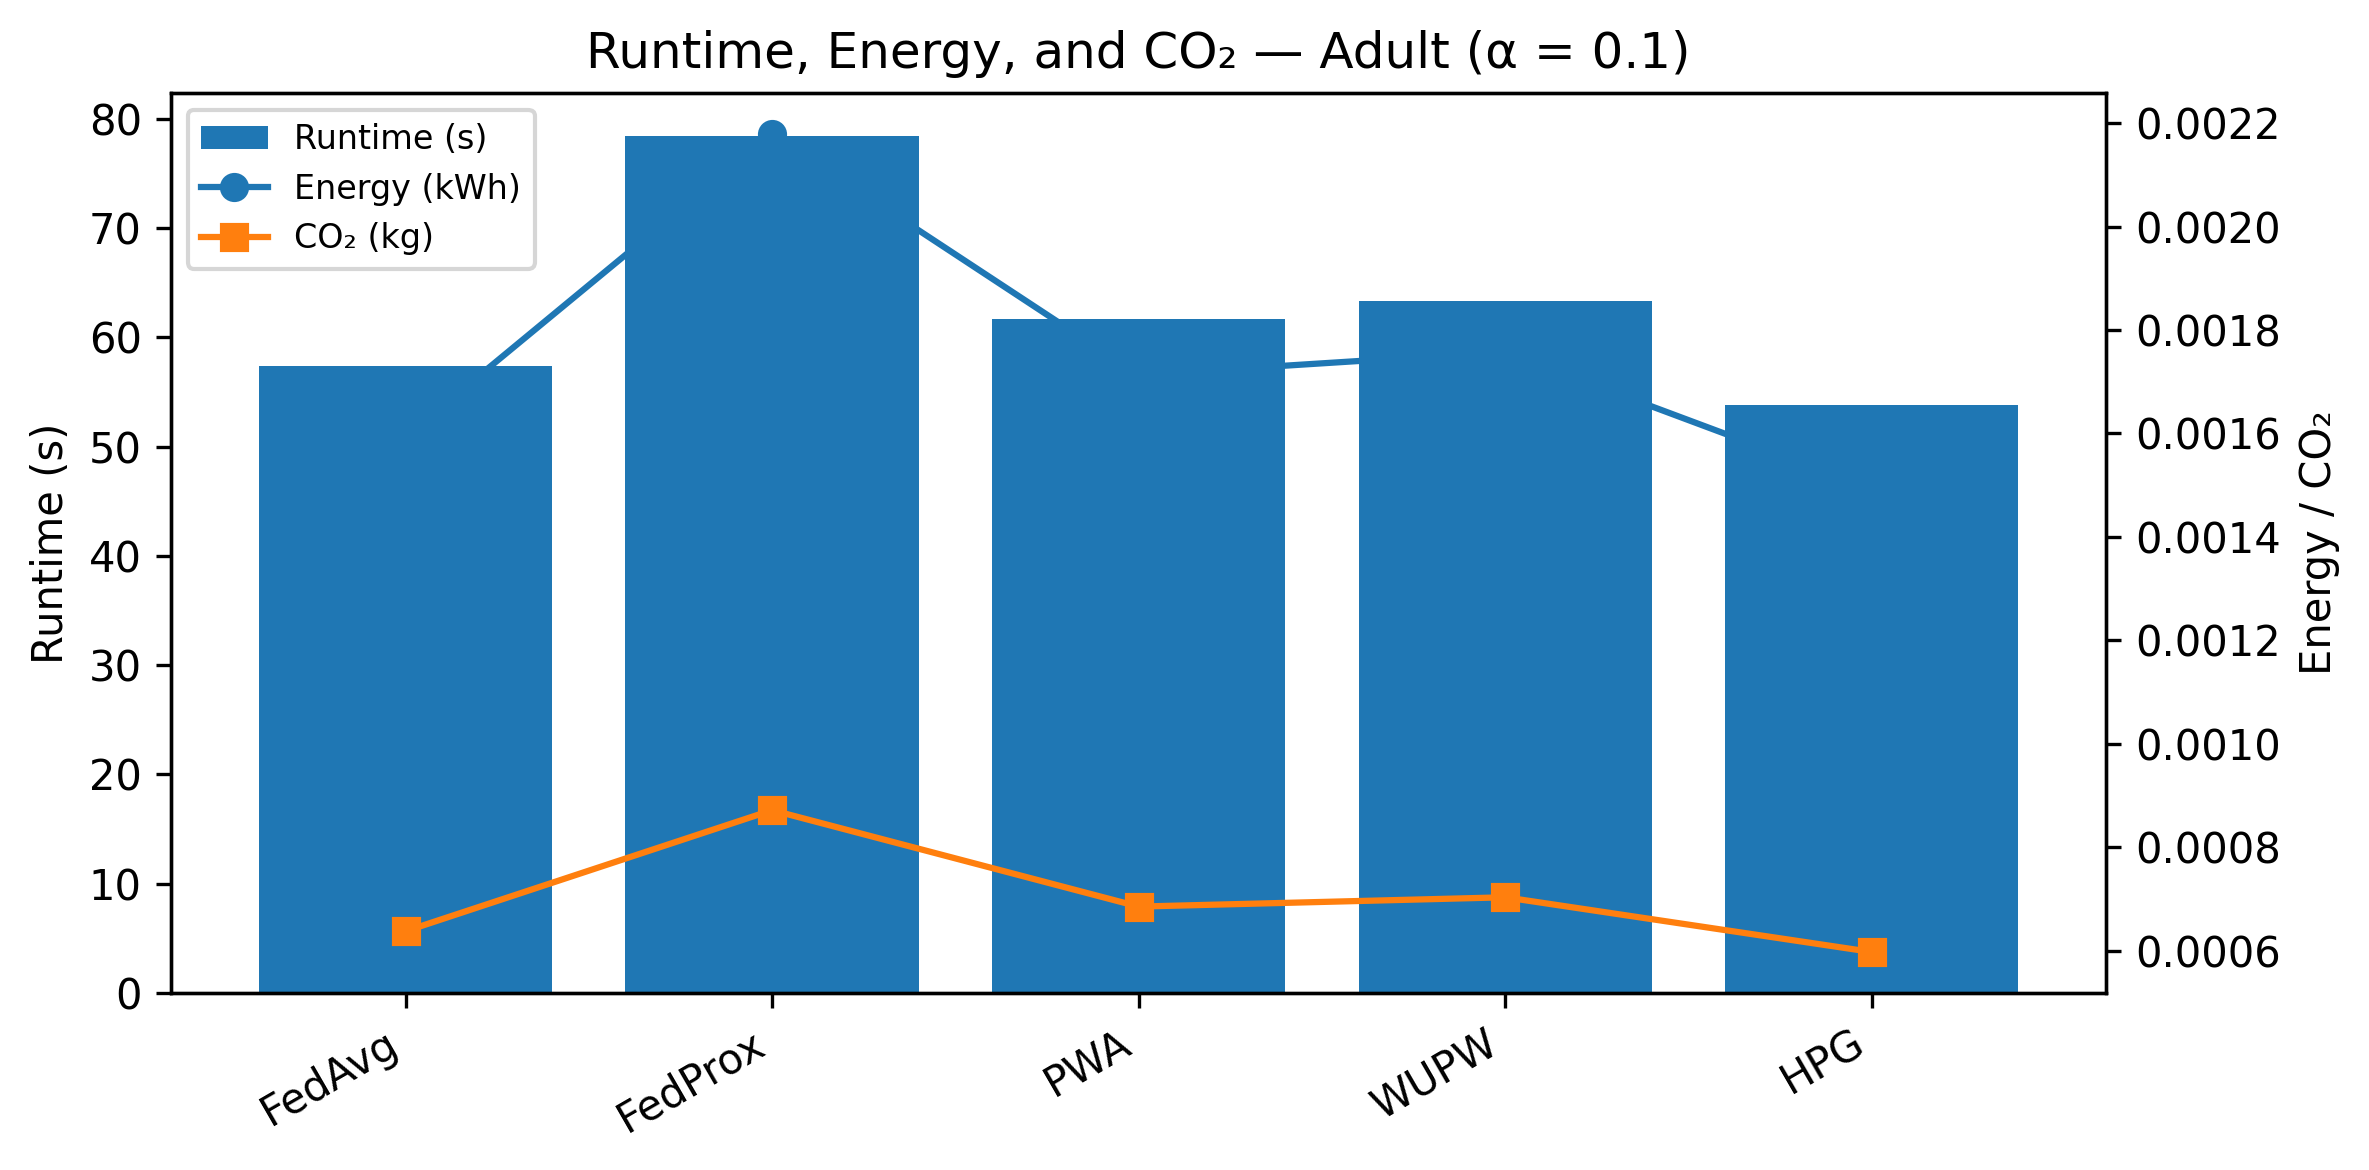

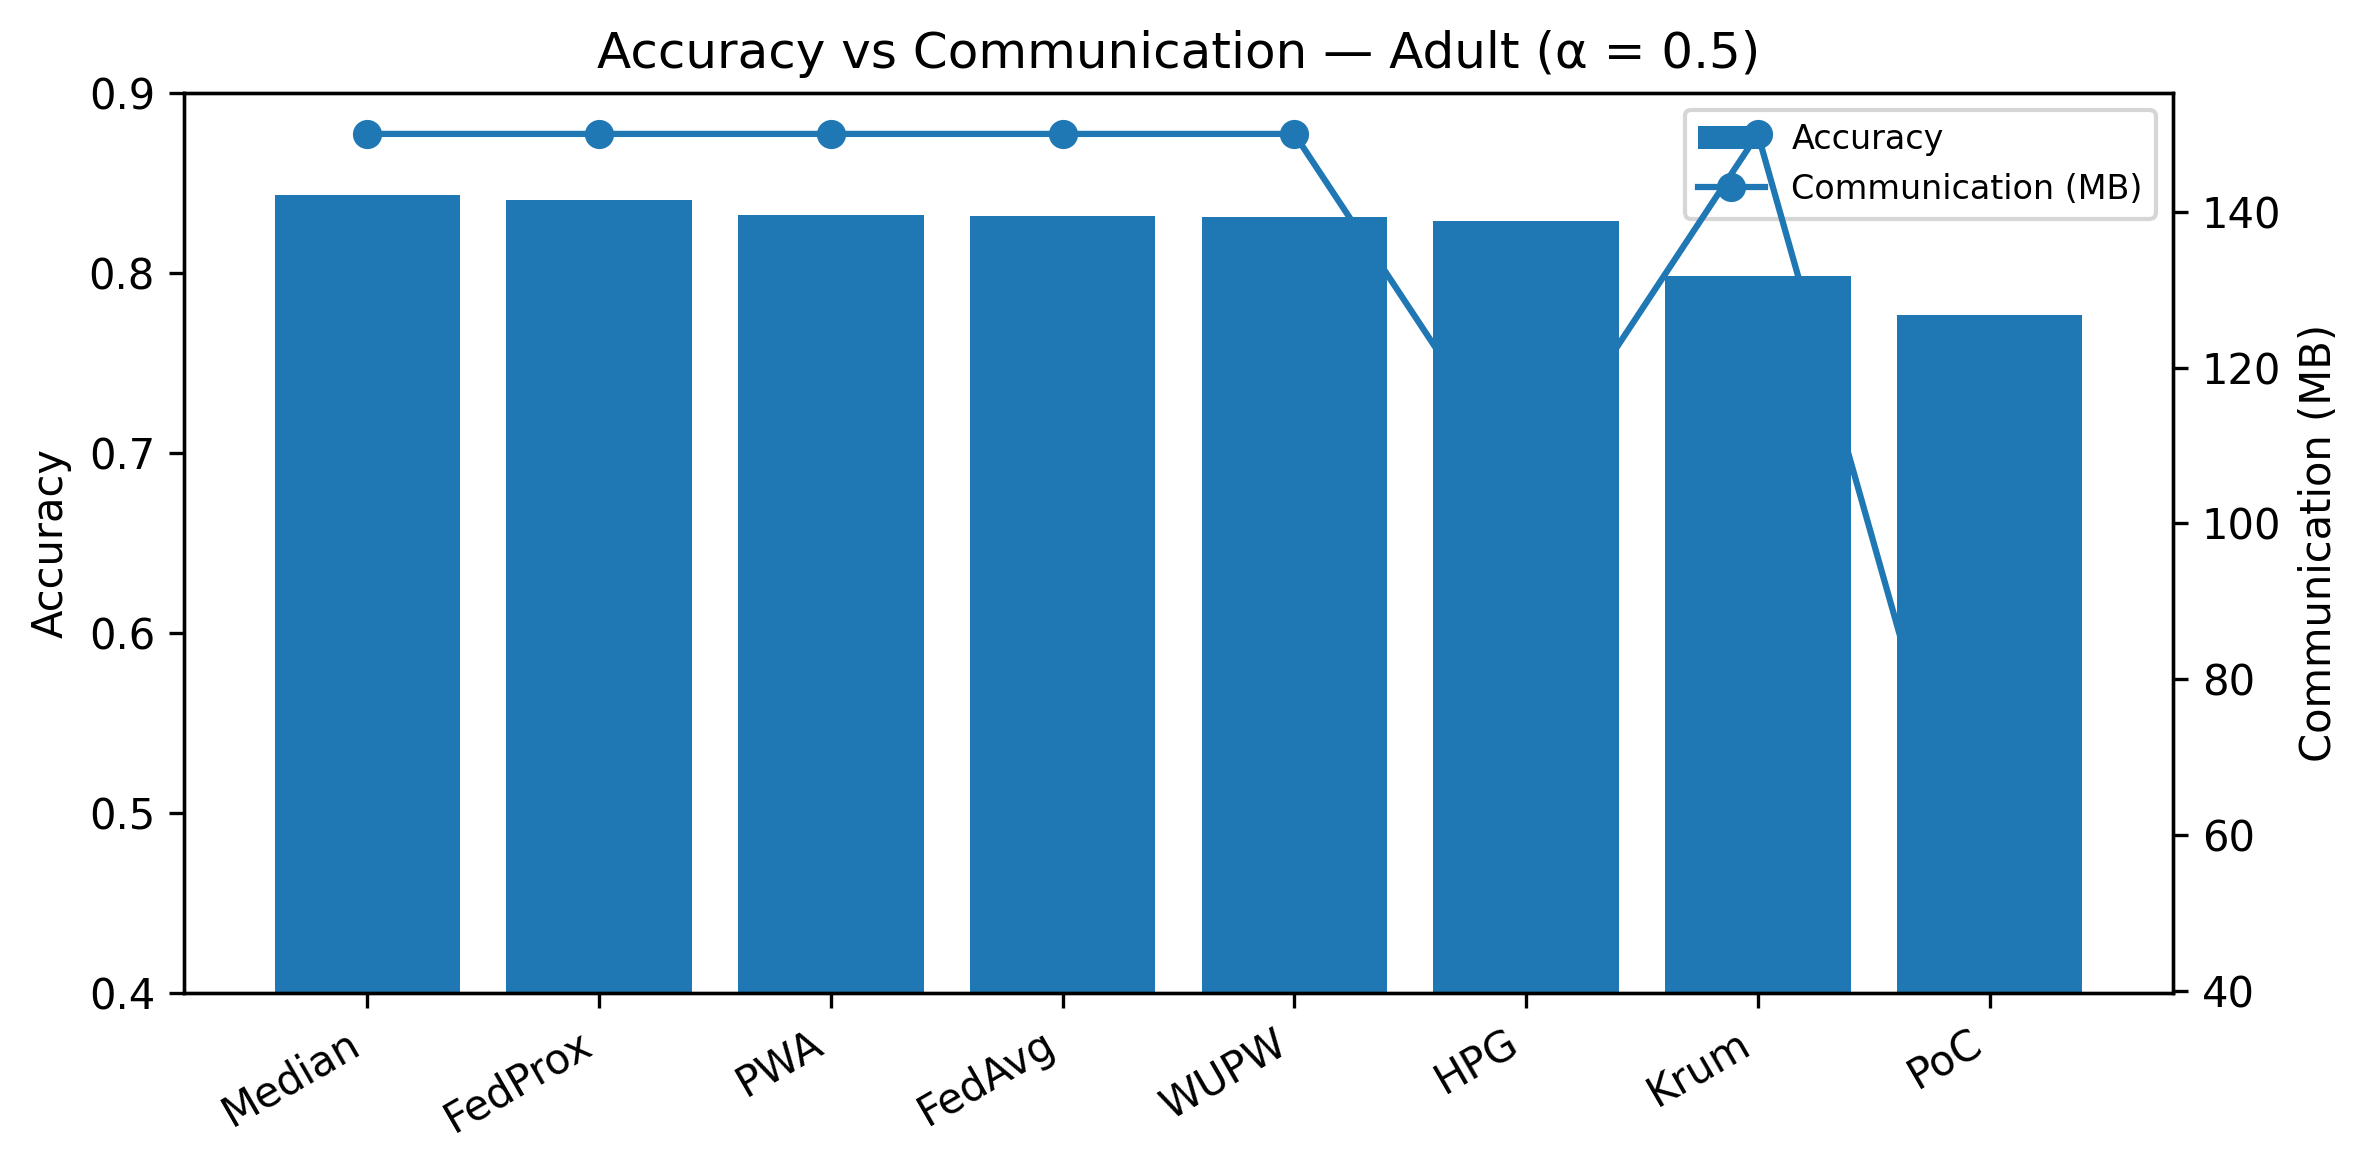

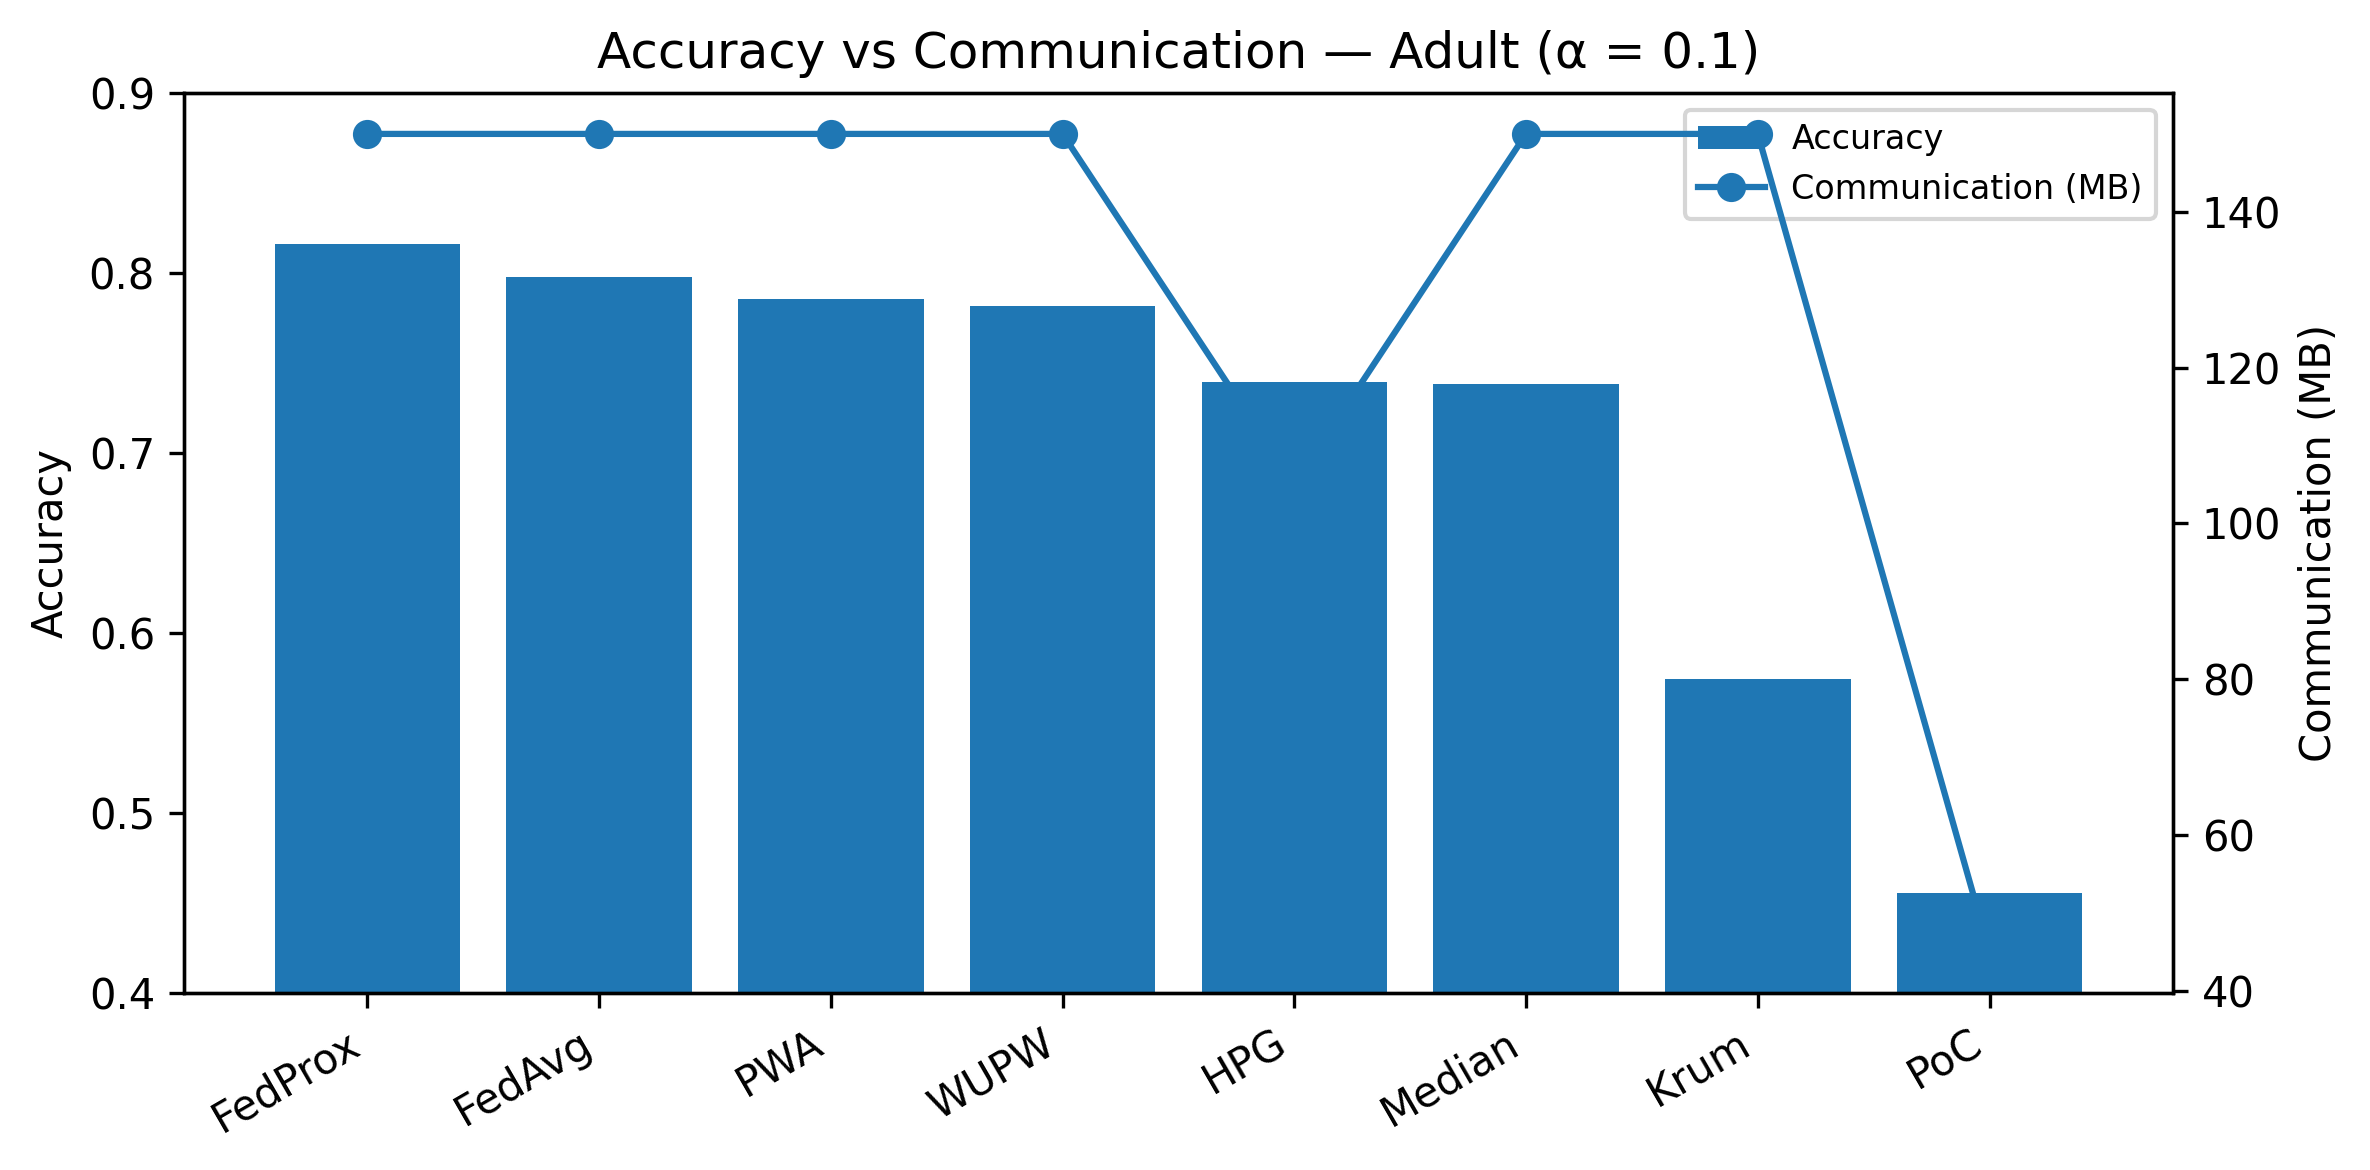

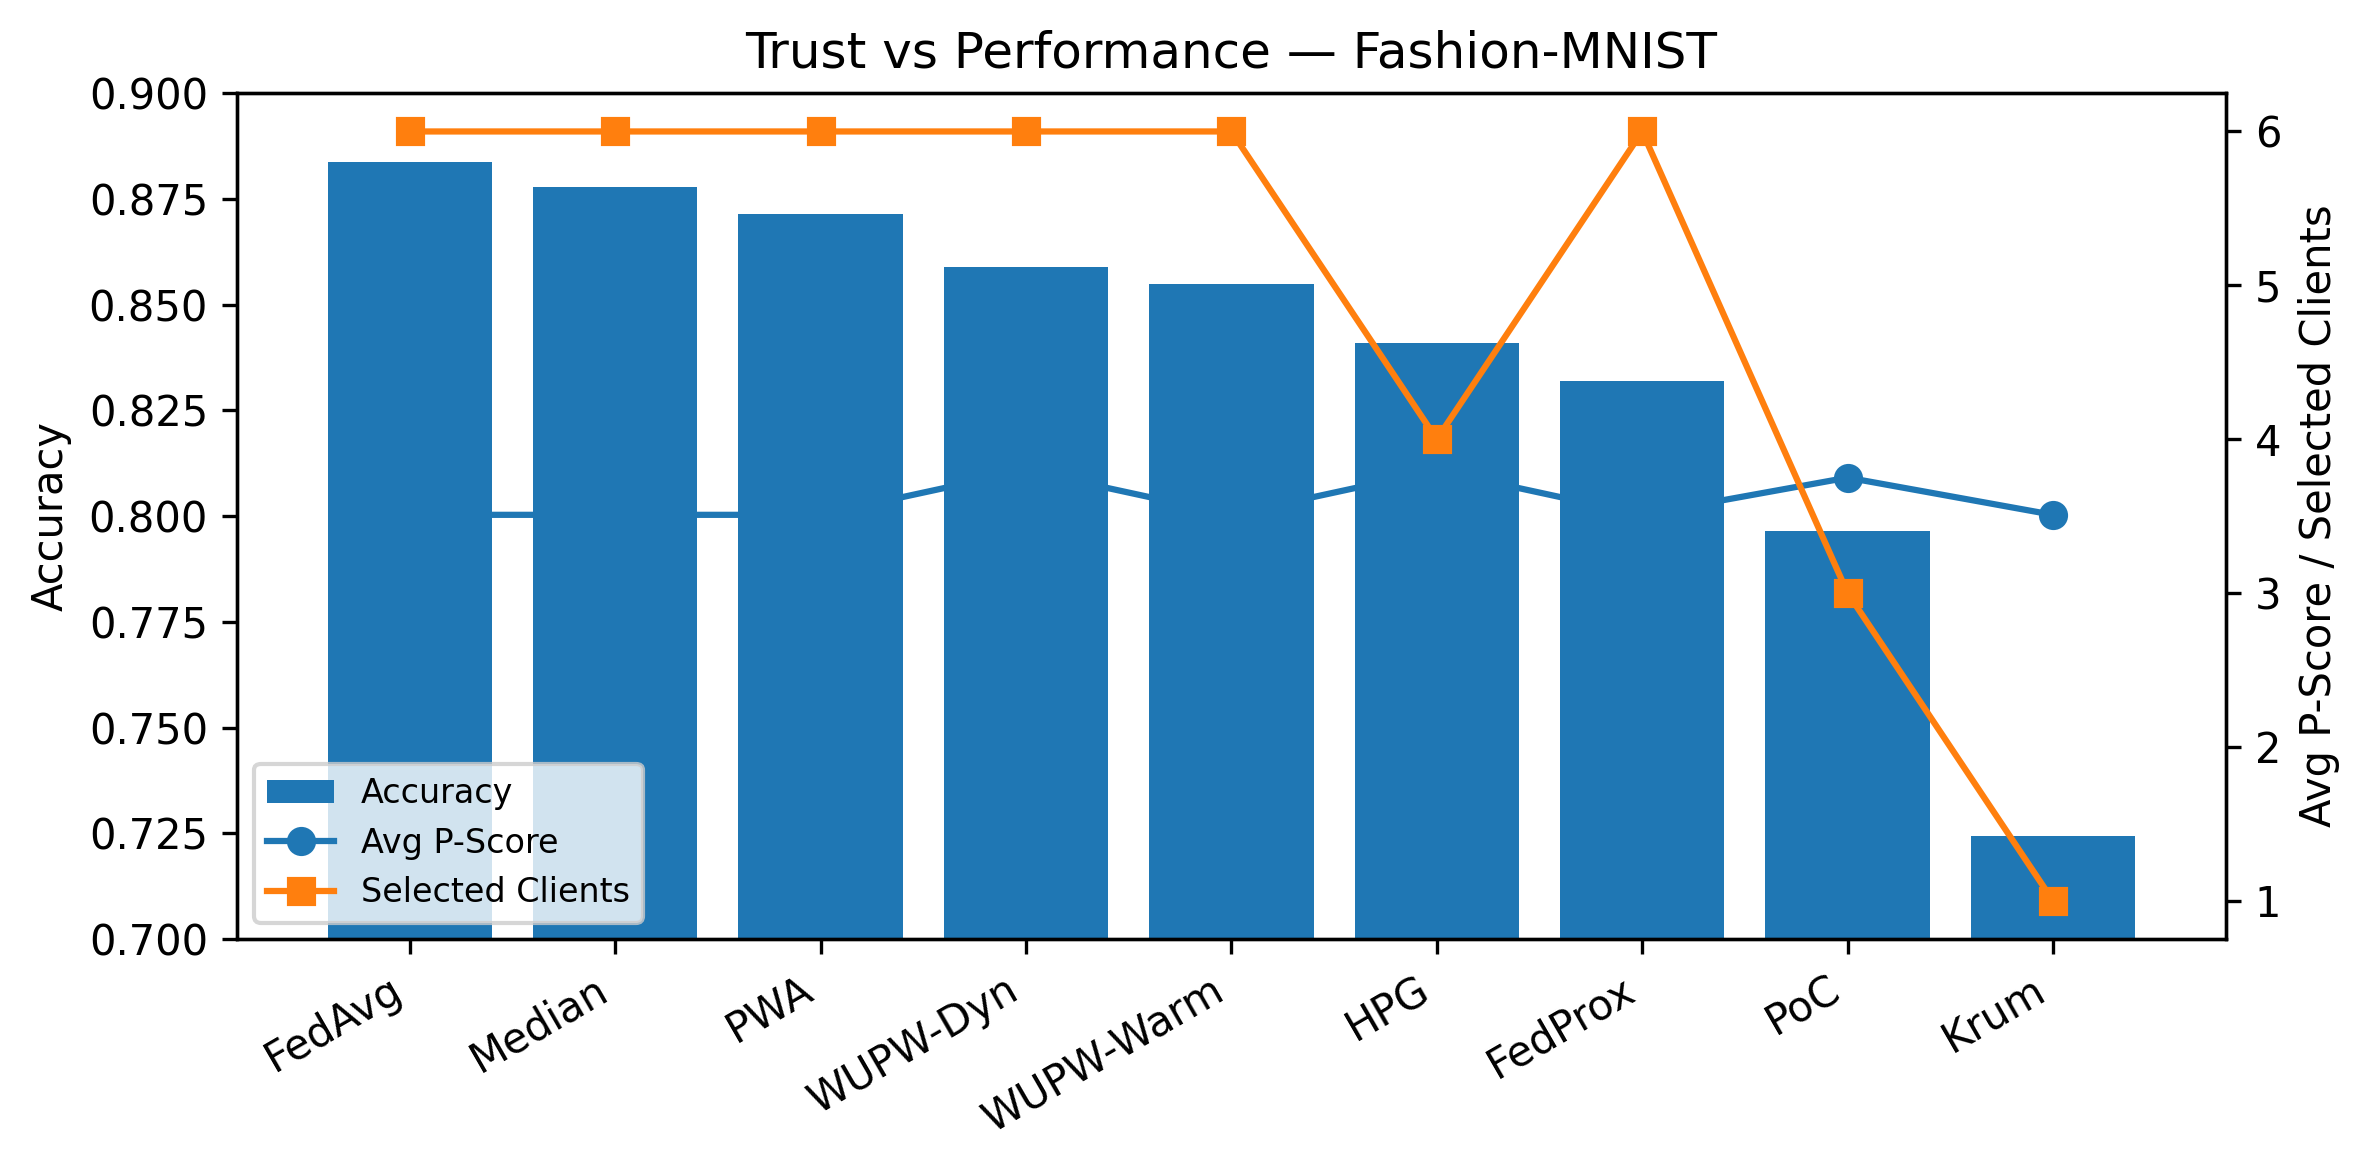


VERIFYING 300 DPI FOR ALL FIGURES:
✓ fig_dirichlet_partitions.png: DPI = (299.9994, 299.9994)
✓ fig_runtime_energy_co2_a05.png: DPI = (299.9994, 299.9994)
✓ fig_runtime_energy_co2_a01.png: DPI = (299.9994, 299.9994)
✓ fig_adult_acc_comm_a05.png: DPI = (299.9994, 299.9994)
✓ fig_adult_acc_comm_a01.png: DPI = (299.9994, 299.9994)
✓ fig_fmnist_trust_performance.png: DPI = (299.9994, 299.9994)
✗ WARNING: Some figures are not 300 DPI


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# SET DPI FOR ALL FIGURES (300 DPI)
# ==============================
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# ==============================
# 1. Adult Dataset Results (α = 0.5 and α = 0.1)
# ==============================

scenarios_a05 = [
    "Median",
    "FedProx",
    "PWA",   # PScoreWeightedFedAvgAll
    "FedAvg",
    "WUPW",  # DynamicPScoreV3
    "HPG",   # StaticPScoreGate
    "Krum",
    "PoC"    # Power-of-Choice
]

accuracy_a05 = np.array([
    0.8433,
    0.8406,
    0.8324,
    0.8317,
    0.8311,
    0.8289,
    0.7985,
    0.7764
])

time_a05 = np.array([
    52.96,
    77.28,
    53.73,
    54.75,
    53.89,
    39.27,
    51.22,
    57.80
])

comm_a05 = np.array([
    150.0,
    150.0,
    150.0,
    150.0,
    150.0,
    105.0,
    150.0,
    45.0
])

avg_pscore_a05 = np.array([
    2.89,
    2.89,
    2.89,
    2.89,
    3.35,
    3.35,
    2.89,
    3.06
])

# α = 0.1
scenarios_a01 = [
    "FedProx",
    "FedAvg",
    "PWA",
    "WUPW",
    "HPG",
    "Median",
    "Krum",
    "PoC"
]

accuracy_a01 = np.array([
    0.8163,
    0.7980,
    0.7857,
    0.7814,
    0.7397,
    0.7381,
    0.5745,
    0.4556
])

time_a01 = np.array([
    78.45,
    57.39,
    61.67,
    63.29,
    53.77,
    54.12,
    53.49,
    51.79
])

comm_a01 = np.array([
    150.0,
    150.0,
    150.0,
    150.0,
    105.0,
    150.0,
    150.0,
    45.0
])

avg_pscore_a01 = np.array([
    2.89,
    2.89,
    2.89,
    3.35,
    3.35,
    2.89,
    2.89,
    2.53
])

# Constants for energy & CO2
DEVICE_POWER_KW = 0.1
CO2_PER_KWH = 0.4

def compute_energy_co2(time_s):
    energy_kwh = DEVICE_POWER_KW * (time_s / 3600.0)
    co2_kg = CO2_PER_KWH * energy_kwh
    return energy_kwh, co2_kg

energy_a05, co2_a05 = compute_energy_co2(time_a05)
energy_a01, co2_a01 = compute_energy_co2(time_a01)

# ==============================
# 2. FMNIST Results
# ==============================

scenarios_fmnist = [
    "FedAvg",
    "Median",
    "PWA",
    "WUPW-Dyn",   # DynamicPScoreV3
    "WUPW-Warm",  # PScoreWeightedFedAvgWarmup
    "HPG",
    "FedProx",
    "PoC",
    "Krum"
]

accuracy_fmnist = np.array([
    0.8836,
    0.8779,
    0.8715,
    0.8588,
    0.8548,
    0.8408,
    0.8319,
    0.7965,
    0.7244
])

time_fmnist = np.array([
    1534.7043,
    1607.6872,
    1551.1180,
    1563.6618,
    1566.2729,
    1123.2493,
    1661.4742,
    1570.1542,
    1600.4909
])

comm_fmnist = np.array([
    15.0,
    15.0,
    15.0,
    15.0,
    15.0,
    10.0,
    15.0,
    7.5,
    15.0
])

selected_clients_fmnist = np.array([
    6,
    6,
    6,
    6,
    6,
    4,
    6,
    3,
    1
])

avg_pscore_fmnist = np.array([
    3.5083,
    3.5083,
    3.5083,
    3.7975,
    3.5083,
    3.7975,
    3.5083,
    3.7500,
    3.5083
])

energy_fmnist, co2_fmnist = compute_energy_co2(time_fmnist)

# ==============================
# FIGURE 2: Non-IID partition visualization (synthetic Dirichlet splits)
# ==============================

np.random.seed(42)

def simulate_dirichlet_partitions(num_clients, num_classes, alpha):
    # For each class, sample allocation over clients, then normalise per client
    class_shares = np.zeros((num_clients, num_classes))
    for c in range(num_classes):
        # Sample proportion of class c across clients
        shares = np.random.dirichlet(alpha * np.ones(num_clients))
        class_shares[:, c] = shares
    # Normalise rows so each client sums to 1
    row_sums = class_shares.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1.0
    return class_shares / row_sums

# Adult: 10 clients, 2 classes
adult_alpha_05 = simulate_dirichlet_partitions(10, 2, 0.5)
adult_alpha_01 = simulate_dirichlet_partitions(10, 2, 0.1)

# FMNIST: 6 clients, 10 classes, alpha=0.5
fmnist_alpha_05 = simulate_dirichlet_partitions(6, 10, 0.5)

clients_adult = [f"C{i+1}" for i in range(10)]
clients_fmnist = [f"C{i+1}" for i in range(6)]

# Plot stacked bars
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Adult α=0.5
bottom = np.zeros(len(clients_adult))
for cls in range(adult_alpha_05.shape[1]):
    axes[0].bar(clients_adult, adult_alpha_05[:, cls], bottom=bottom, label=f"Class {cls}")
    bottom += adult_alpha_05[:, cls]
axes[0].set_title("Adult (α = 0.5) — Synthetic Class Proportions")
axes[0].set_xlabel("Client")
axes[0].set_ylabel("Class proportion")
axes[0].legend(fontsize=7, loc="upper right")

# Adult α=0.1
bottom = np.zeros(len(clients_adult))
for cls in range(adult_alpha_01.shape[1]):
    axes[1].bar(clients_adult, adult_alpha_01[:, cls], bottom=bottom, label=f"Class {cls}")
    bottom += adult_alpha_01[:, cls]
axes[1].set_title("Adult (α = 0.1) — Synthetic Class Proportions")
axes[1].set_xlabel("Client")

# FMNIST α=0.5
bottom = np.zeros(len(clients_fmnist))
for cls in range(fmnist_alpha_05.shape[1]):
    axes[2].bar(clients_fmnist, fmnist_alpha_05[:, cls], bottom=bottom, label=f"Class {cls}")
    bottom += fmnist_alpha_05[:, cls]
axes[2].set_title("Fashion-MNIST (α = 0.5) — Synthetic Class Proportions")
axes[2].set_xlabel("Client")

plt.tight_layout()
plt.savefig('fig_dirichlet_partitions.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ==============================
# FIGURE 3: Runtime → Energy → CO₂ (Adult α = 0.5 and α = 0.1)
# ==============================

def plot_runtime_energy_co2(methods, time_s, energy_kwh, co2_kg, alpha_label, filename=None):
    x = np.arange(len(methods))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    bars = ax1.bar(x, time_s, label="Runtime (s)")
    ax1.set_xticks(x)
    ax1.set_xticklabels(methods, rotation=30, ha="right")
    ax1.set_ylabel("Runtime (s)")
    ax1.set_title(f"Runtime, Energy, and CO₂ — Adult (α = {alpha_label})")

    ax2 = ax1.twinx()
    line1, = ax2.plot(x, energy_kwh, marker="o", label="Energy (kWh)")
    line2, = ax2.plot(x, co2_kg, marker="s", label="CO₂ (kg)")
    ax2.set_ylabel("Energy / CO₂")

    # Combined legend
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left", fontsize=8)

    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

# Choose core governance + baseline methods for clarity
methods_a05 = ["FedAvg", "FedProx", "PWA", "WUPW", "HPG"]
time_a05_core = np.array([
    time_a05[scenarios_a05.index("FedAvg")],
    time_a05[scenarios_a05.index("FedProx")],
    time_a05[scenarios_a05.index("PWA")],
    time_a05[scenarios_a05.index("WUPW")],
    time_a05[scenarios_a05.index("HPG")]
])
energy_a05_core, co2_a05_core = compute_energy_co2(time_a05_core)

methods_a01 = ["FedAvg", "FedProx", "PWA", "WUPW", "HPG"]
time_a01_core = np.array([
    time_a01[scenarios_a01.index("FedAvg")],
    time_a01[scenarios_a01.index("FedProx")],
    time_a01[scenarios_a01.index("PWA")],
    time_a01[scenarios_a01.index("WUPW")],
    time_a01[scenarios_a01.index("HPG")]
])
energy_a01_core, co2_a01_core = compute_energy_co2(time_a01_core)

plot_runtime_energy_co2(methods_a05, time_a05_core, energy_a05_core, co2_a05_core, "0.5", filename="fig_runtime_energy_co2_a05.png")
plot_runtime_energy_co2(methods_a01, time_a01_core, energy_a01_core, co2_a01_core, "0.1", filename="fig_runtime_energy_co2_a01.png")

# ==============================
# FIGURE 4: Adult — Accuracy vs Communication
# ==============================

def plot_accuracy_vs_comm(methods, accuracy, comm, alpha_label, filename=None):
    x = np.arange(len(methods))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    bars = ax1.bar(x, accuracy, label="Accuracy")
    ax1.set_xticks(x)
    ax1.set_xticklabels(methods, rotation=30, ha="right")
    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0.4, 0.9)
    ax1.set_title(f"Accuracy vs Communication — Adult (α = {alpha_label})")

    ax2 = ax1.twinx()
    line, = ax2.plot(x, comm, marker="o", label="Communication (MB)")
    ax2.set_ylabel("Communication (MB)")

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right", fontsize=8)

    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

plot_accuracy_vs_comm(scenarios_a05, accuracy_a05, comm_a05, "0.5", filename="fig_adult_acc_comm_a05.png")
plot_accuracy_vs_comm(scenarios_a01, accuracy_a01, comm_a01, "0.1", filename="fig_adult_acc_comm_a01.png")

# ==============================
# FIGURE 5: FMNIST — Trust vs Performance
# ==============================

def plot_fmnist_trust_performance(methods, accuracy, avg_pscore, selected_clients, filename=None):
    x = np.arange(len(methods))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    bars = ax1.bar(x, accuracy, label="Accuracy")
    ax1.set_xticks(x)
    ax1.set_xticklabels(methods, rotation=30, ha="right")
    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0.7, 0.9)
    ax1.set_title("Trust vs Performance — Fashion-MNIST")

    ax2 = ax1.twinx()
    line1, = ax2.plot(x, avg_pscore, marker="o", label="Avg P-Score")
    line2, = ax2.plot(x, selected_clients, marker="s", label="Selected Clients")
    ax2.set_ylabel("Avg P-Score / Selected Clients")

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left", fontsize=8)

    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

plot_fmnist_trust_performance(scenarios_fmnist, accuracy_fmnist, avg_pscore_fmnist, selected_clients_fmnist, filename="fig_fmnist_trust_performance.png")

# ==============================
# VERIFY ALL FIGURES ARE 300 DPI
# ==============================
def verify_dpi(filename):
    from PIL import Image
    try:
        img = Image.open(filename)
        dpi = img.info.get('dpi', (72, 72))
        print(f"✓ {filename}: DPI = {dpi}")
        return dpi[0] == 300
    except Exception as e:
        print(f"✗ Could not check {filename}: {e}")
        return False

print("\n" + "="*50)
print("VERIFYING 300 DPI FOR ALL FIGURES:")
print("="*50)

files_to_check = [
    'fig_dirichlet_partitions.png',
    'fig_runtime_energy_co2_a05.png',
    'fig_runtime_energy_co2_a01.png',
    'fig_adult_acc_comm_a05.png',
    'fig_adult_acc_comm_a01.png',
    'fig_fmnist_trust_performance.png'
]

all_300_dpi = True
for file in files_to_check:
    if not verify_dpi(file):
        all_300_dpi = False

print("="*50)
if all_300_dpi:
    print("✓ SUCCESS: All figures are 300 DPI")
else:
    print("✗ WARNING: Some figures are not 300 DPI")
print("="*50)

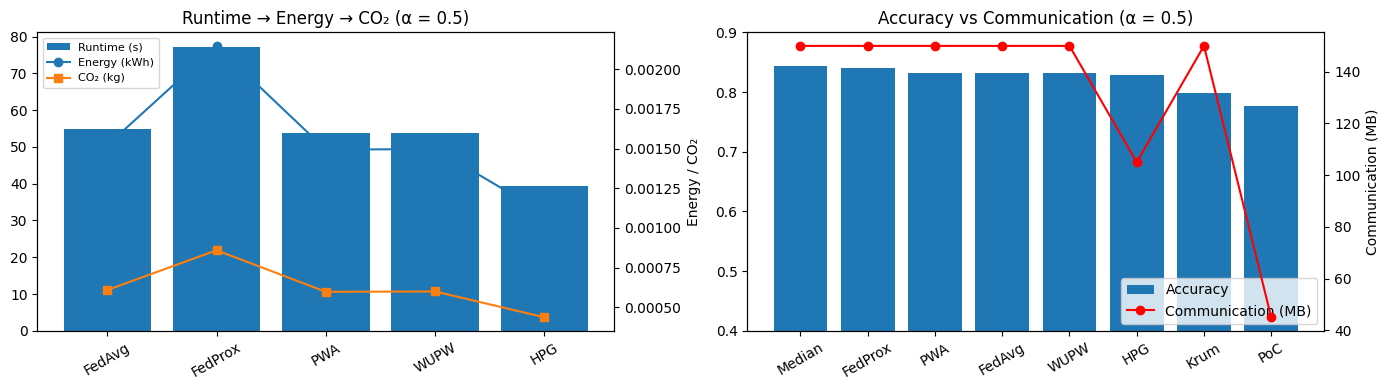

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Adult α = 0.5
# -----------------------------
methods = ["FedAvg", "FedProx", "PWA", "WUPW", "HPG"]

time_a05 = np.array([54.75, 77.28, 53.73, 53.89, 39.27])
energy_a05 = 0.1 * (time_a05 / 3600)
co2_a05 = 0.4 * energy_a05

# Accuracy & Communication for α=0.5
methods_a05_acc = ["Median","FedProx","PWA","FedAvg","WUPW","HPG","Krum","PoC"]
accuracy_a05 = np.array([0.8433,0.8406,0.8324,0.8317,0.8311,0.8289,0.7985,0.7764])
comm_a05 = np.array([150,150,150,150,150,105,150,45])

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# --- Left: Runtime / Energy / CO2 ---
ax1 = axes[0]
x = np.arange(len(methods))
ax1.bar(x, time_a05, label="Runtime (s)")
ax1.set_xticks(x)
ax1.set_xticklabels(methods, rotation=30)
ax1.set_title("Runtime → Energy → CO₂ (α = 0.5)")

ax1b = ax1.twinx()
ax1b.plot(x, energy_a05, marker='o', label="Energy (kWh)")
ax1b.plot(x, co2_a05, marker='s', label="CO₂ (kg)")
ax1b.set_ylabel("Energy / CO₂")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax1b.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left", fontsize=8)

# --- Right: Accuracy / Communication ---
ax2 = axes[1]
x2 = np.arange(len(methods_a05_acc))
ax2.bar(x2, accuracy_a05, label="Accuracy")
ax2.set_xticks(x2)
ax2.set_xticklabels(methods_a05_acc, rotation=30)
ax2.set_title("Accuracy vs Communication (α = 0.5)")
ax2.set_ylim(0.4, 0.9)

ax2b = ax2.twinx()
ax2b.plot(x2, comm_a05, marker='o', color='red', label="Communication (MB)")
ax2b.set_ylabel("Communication (MB)")

h1, l1 = ax2.get_legend_handles_labels()
h2, l2 = ax2b.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc="lower right")

plt.tight_layout()
plt.show()


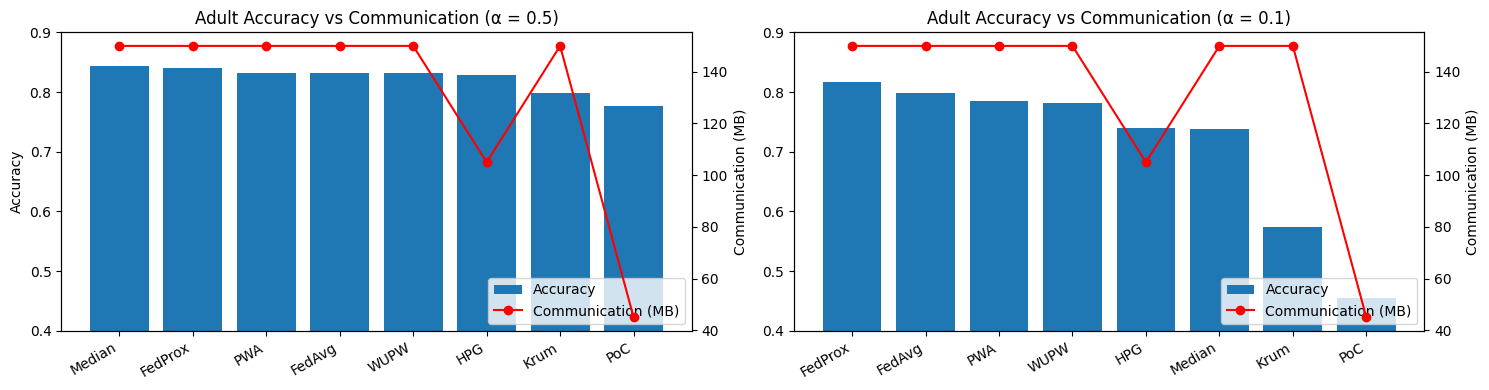

In [4]:
import numpy as np
import matplotlib.pyplot as plt

methods_a05 = ["Median","FedProx","PWA","FedAvg","WUPW","HPG","Krum","PoC"]
accuracy_a05 = np.array([0.8433,0.8406,0.8324,0.8317,0.8311,0.8289,0.7985,0.7764])
comm_a05 = np.array([150,150,150,150,150,105,150,45])

methods_a01 = ["FedProx","FedAvg","PWA","WUPW","HPG","Median","Krum","PoC"]
accuracy_a01 = np.array([0.8163,0.798,0.7857,0.7814,0.7397,0.7381,0.5745,0.4556])
comm_a01 = np.array([150,150,150,150,105,150,150,45])

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# α = 0.5
ax1 = axes[0]
x = np.arange(len(methods_a05))
ax1.bar(x, accuracy_a05, label="Accuracy")
ax1.set_xticks(x)
ax1.set_xticklabels(methods_a05, rotation=30, ha="right")
ax1.set_ylim(0.4, 0.9)
ax1.set_title("Adult Accuracy vs Communication (α = 0.5)")
ax1.set_ylabel("Accuracy")

ax1b = ax1.twinx()
ax1b.plot(x, comm_a05, marker='o', color='red', label="Communication (MB)")
ax1b.set_ylabel("Communication (MB)")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1b.get_legend_handles_labels()
ax1.legend(handles1+handles2, labels1+labels2, loc="lower right")

# α = 0.1
ax2 = axes[1]
x = np.arange(len(methods_a01))
ax2.bar(x, accuracy_a01, label="Accuracy")
ax2.set_xticks(x)
ax2.set_xticklabels(methods_a01, rotation=30, ha="right")
ax2.set_ylim(0.4, 0.9)
ax2.set_title("Adult Accuracy vs Communication (α = 0.1)")

ax2b = ax2.twinx()
ax2b.plot(x, comm_a01, marker='o', color='red', label="Communication (MB)")
ax2b.set_ylabel("Communication (MB)")

handles1, labels1 = ax2.get_legend_handles_labels()
handles2, labels2 = ax2b.get_legend_handles_labels()
ax2.legend(handles1+handles2, labels1+labels2, loc="lower right")

plt.tight_layout()
plt.show()


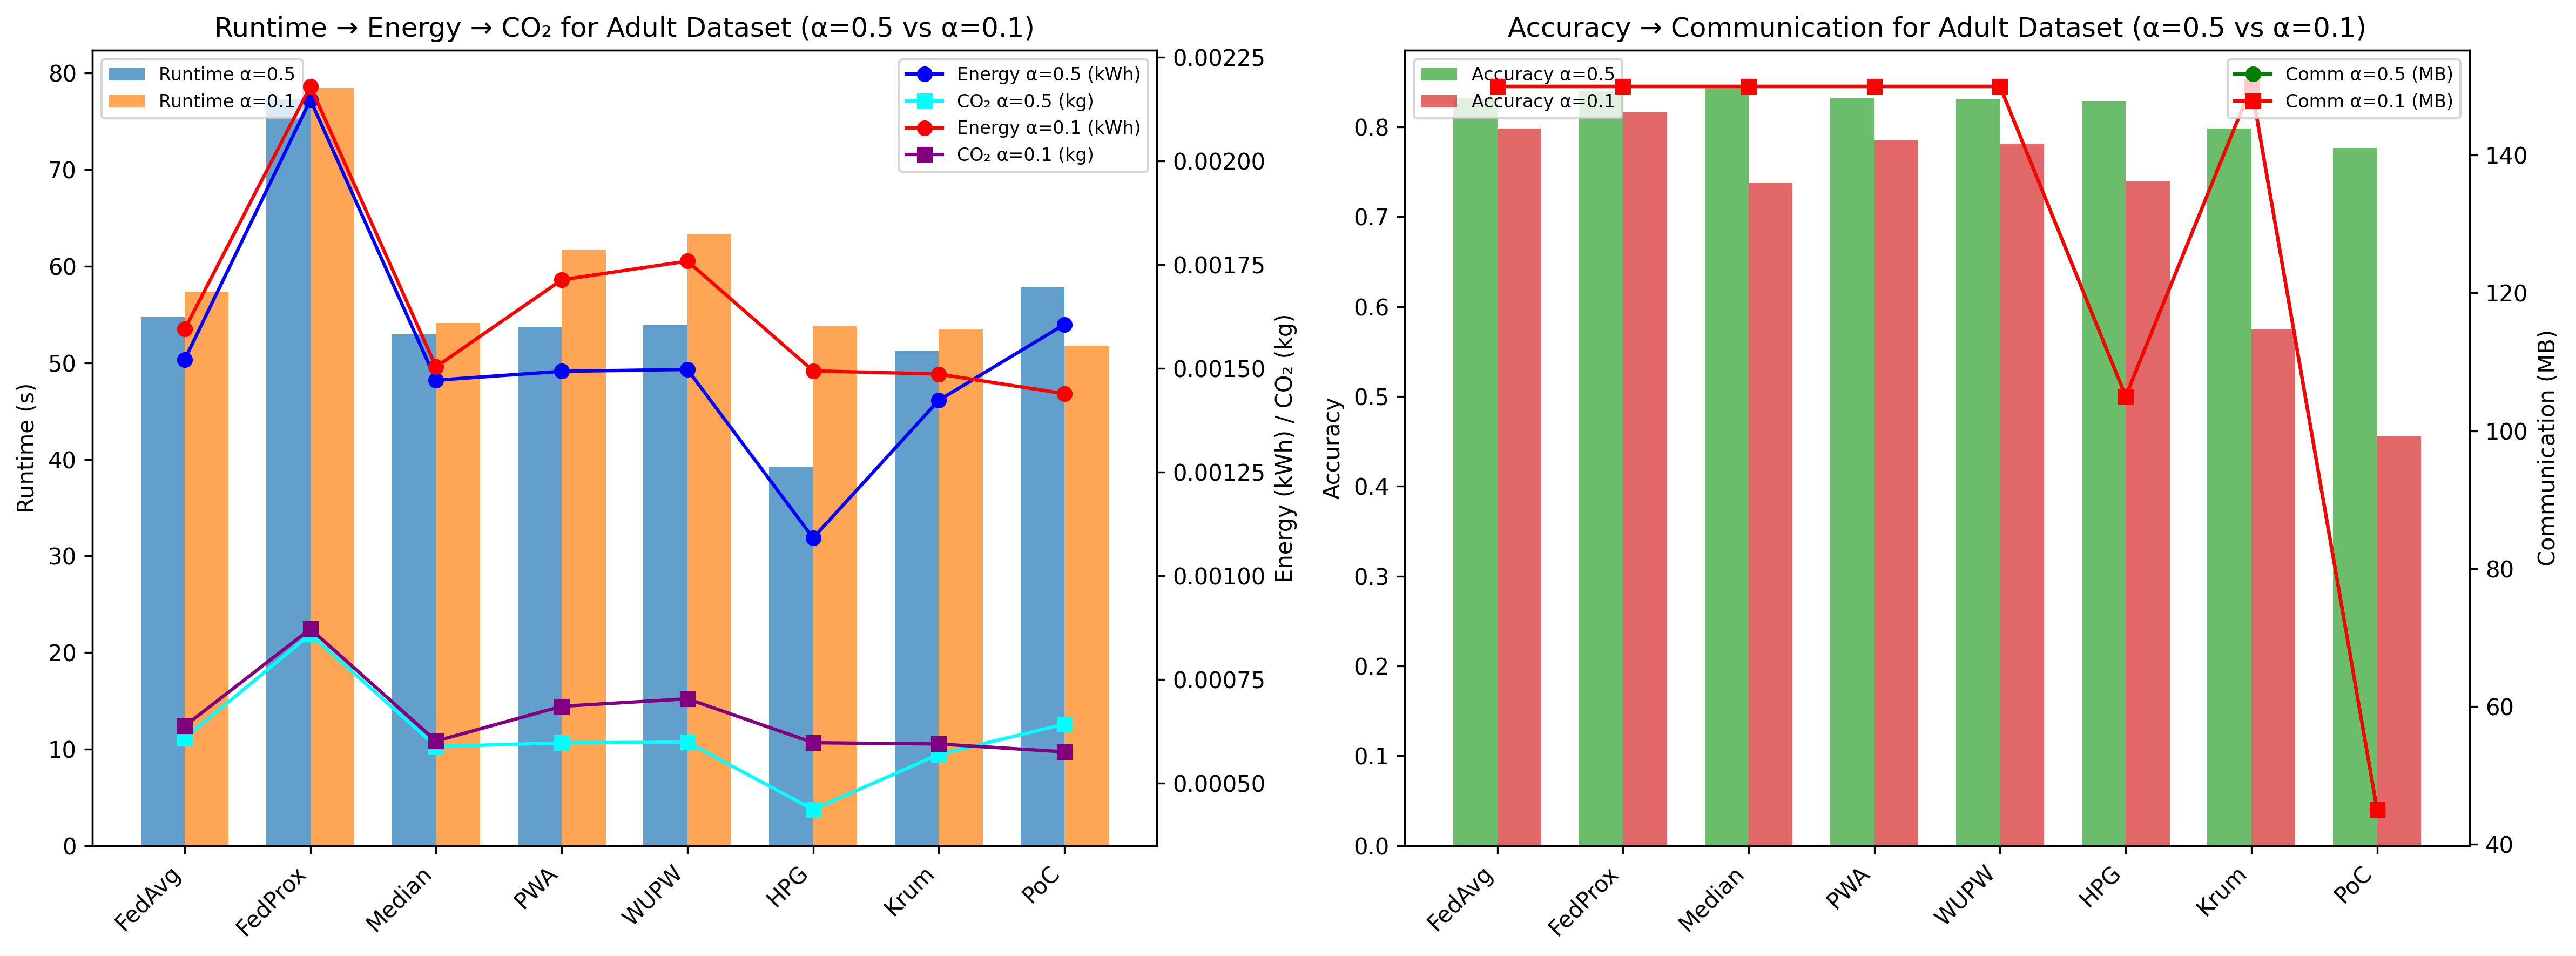

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set DPI for high-resolution output
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# -----------------------------
# Adult α = 0.5
# -----------------------------
methods = [
    "FedAvg", "FedProx", "Median",
    "PWA", "WUPW", "HPG", "Krum", "PoC"
]

acc_a05 = np.array([0.8317,0.8406,0.8433,0.8324,0.8311,0.8289,0.7985,0.7764])
comm_a05 = np.array([150,150,150,150,150,105,150,45])
runtime_a05 = np.array([54.75,77.28,52.96,53.73,53.89,39.27,51.22,57.80])

energy_a05 = 0.1 * (runtime_a05/3600)
co2_a05 = 0.4 * energy_a05

# -----------------------------
# Adult α = 0.1
# -----------------------------
acc_a01 = np.array([0.7980,0.8163,0.7381,0.7857,0.7814,0.7397,0.5745,0.4556])
comm_a01 = np.array([150,150,150,150,150,105,150,45])
runtime_a01 = np.array([57.39,78.45,54.12,61.67,63.29,53.77,53.49,51.79])

energy_a01 = 0.1 * (runtime_a01/3600)
co2_a01 = 0.4 * energy_a01

# -----------------------------
# FIGURE 1 - Create with explicit DPI
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ===========================================
# PANEL A — Runtime → Energy → CO2
# ===========================================
ax = axes[0]
x = np.arange(len(methods))

width = 0.35

# Runtime bars
ax.bar(x - width/2, runtime_a05, width, label="Runtime α=0.5", color="tab:blue", alpha=0.7)
ax.bar(x + width/2, runtime_a01, width, label="Runtime α=0.1", color="tab:orange", alpha=0.7)

ax.set_ylabel("Runtime (s)")
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_title("Runtime → Energy → CO₂ for Adult Dataset (α=0.5 vs α=0.1)")

# Secondary axis for energy and CO2
ax2 = ax.twinx()
ax2.plot(x, energy_a05, marker='o', color="blue", label="Energy α=0.5 (kWh)")
ax2.plot(x, co2_a05, marker='s', color="cyan", label="CO₂ α=0.5 (kg)")
ax2.plot(x, energy_a01, marker='o', color="red", label="Energy α=0.1 (kWh)")
ax2.plot(x, co2_a01, marker='s', color="purple", label="CO₂ α=0.1 (kg)")
ax2.set_ylabel("Energy (kWh) / CO₂ (kg)")

# Legends
ax.legend(loc="upper left", fontsize=8)
ax2.legend(loc="upper right", fontsize=8)

# ===========================================
# PANEL B — Accuracy → Communication
# ===========================================
ax = axes[1]

# Accuracy bars
ax.bar(x - width/2, acc_a05, width, label="Accuracy α=0.5", color="tab:green", alpha=0.7)
ax.bar(x + width/2, acc_a01, width, label="Accuracy α=0.1", color="tab:red", alpha=0.7)

ax.set_ylabel("Accuracy")
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_title("Accuracy → Communication for Adult Dataset (α=0.5 vs α=0.1)")

# Secondary axis for communication
ax2 = ax.twinx()
ax2.plot(x, comm_a05, marker='o', color="green", label="Comm α=0.5 (MB)")
ax2.plot(x, comm_a01, marker='s', color="red", label="Comm α=0.1 (MB)")
ax2.set_ylabel("Communication (MB)")

ax.legend(loc="upper left", fontsize=8)
ax2.legend(loc="upper right", fontsize=8)

plt.tight_layout()

# Save with explicit DPI
plt.savefig('adult_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

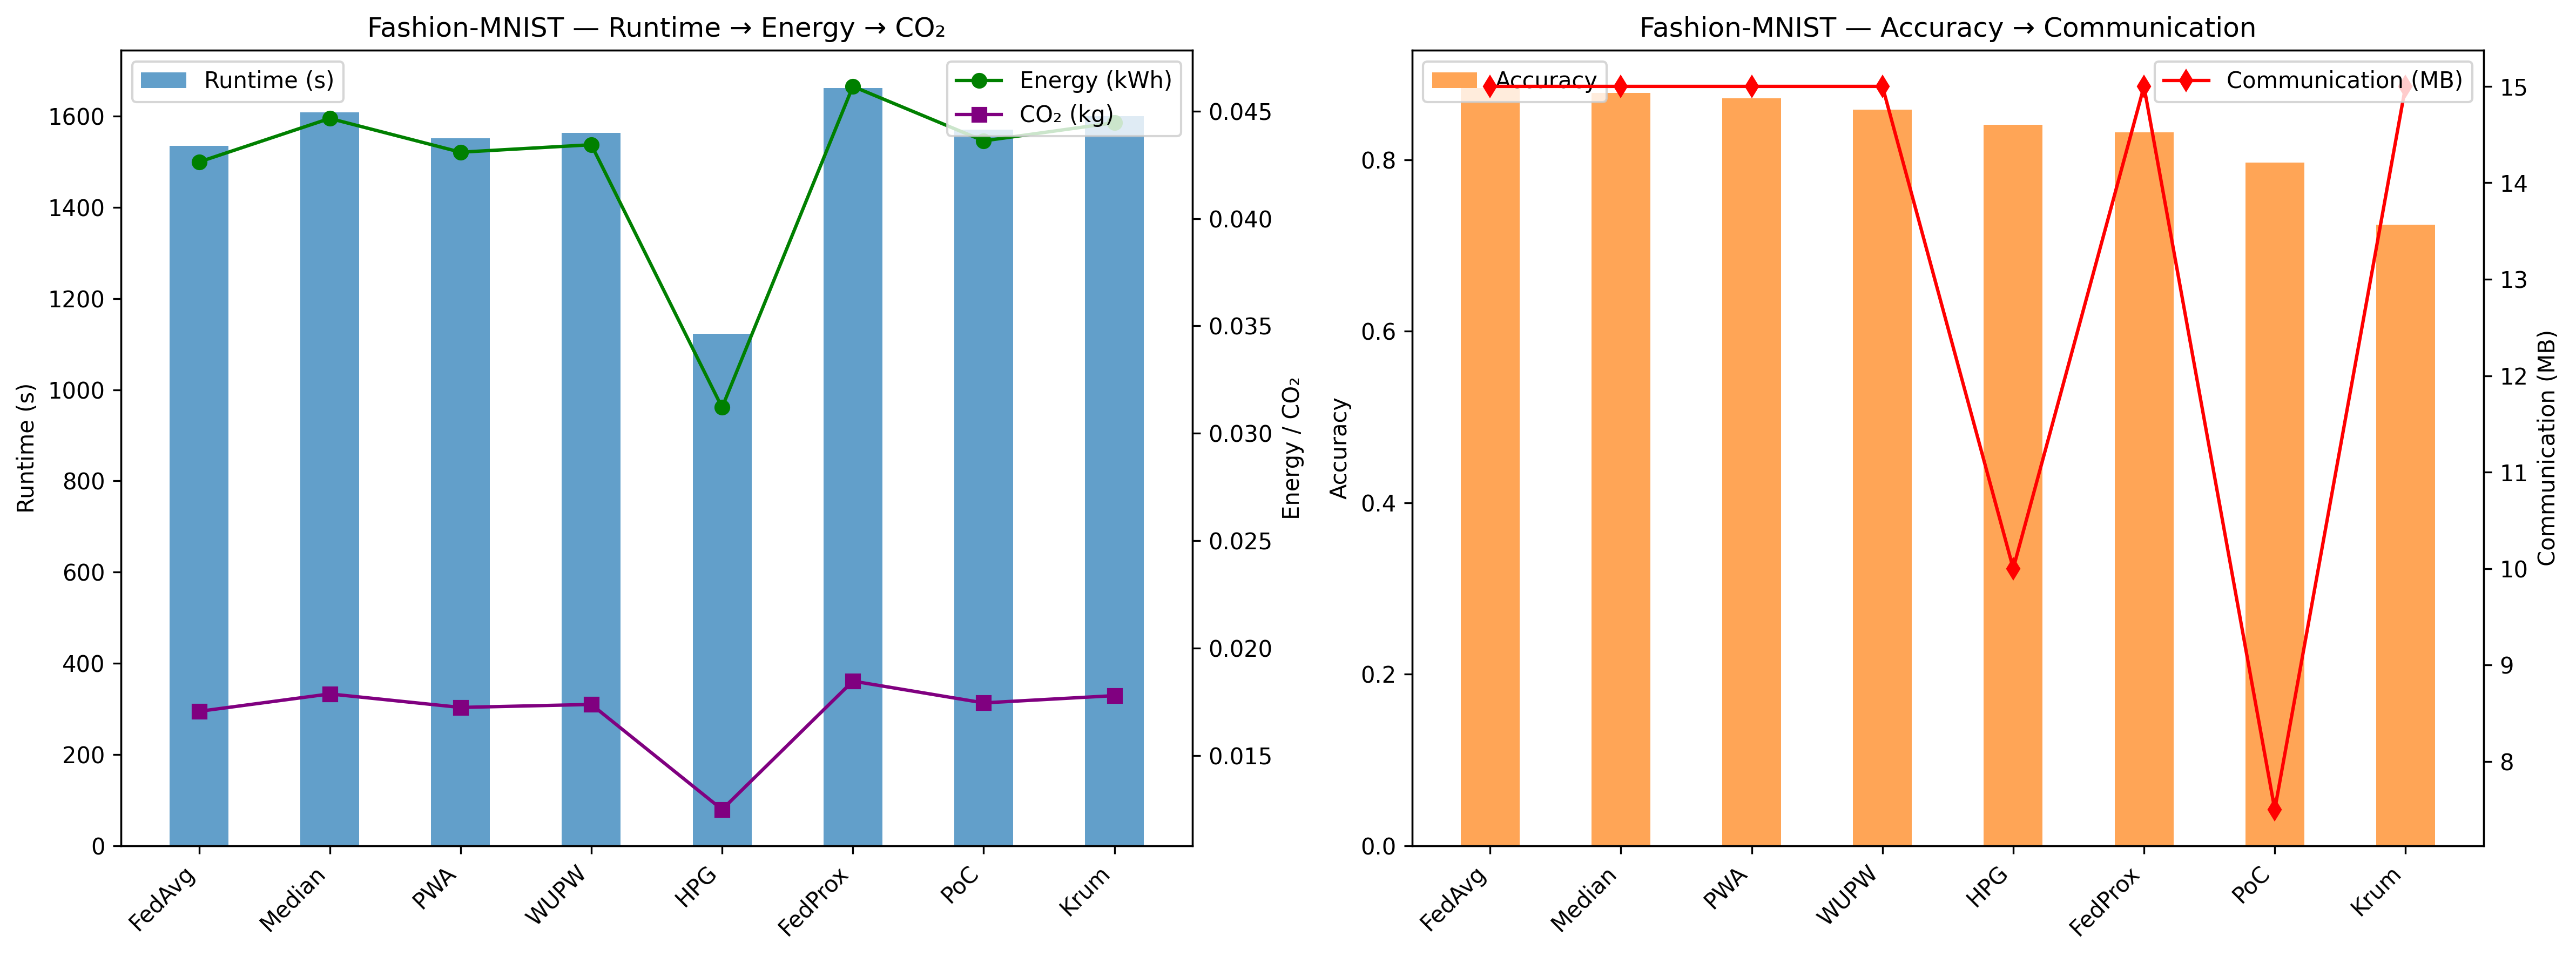

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set DPI for high-resolution output
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# -----------------------------
# F-MNIST Results
# -----------------------------
methods_fm = ["FedAvg","Median","PWA","WUPW","HPG","FedProx","PoC","Krum"]

acc = np.array([0.8836,0.8779,0.8715,0.8588,0.8408,0.8319,0.7965,0.7244])
comm = np.array([15,15,15,15,10,15,7.5,15])
runtime = np.array([1534.7,1607.7,1551.1,1563.6,1123.2,1661.4,1570.1,1600.5])

energy = 0.1 * (runtime/3600)
co2 = 0.4 * energy

# -----------------------------
# FIGURE 2 - Create with explicit DPI
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ===========================================
# PANEL A — Runtime → Energy → CO₂
# ===========================================
ax = axes[0]
x = np.arange(len(methods_fm))
width = 0.45

ax.bar(x, runtime, width, label="Runtime (s)", color="tab:blue", alpha=0.7)
ax.set_ylabel("Runtime (s)")
ax.set_xticks(x)
ax.set_xticklabels(methods_fm, rotation=45, ha="right")
ax.set_title("Fashion-MNIST — Runtime → Energy → CO₂")

ax2 = ax.twinx()
ax2.plot(x, energy, marker="o", color="green", label="Energy (kWh)")
ax2.plot(x, co2, marker="s", color="purple", label="CO₂ (kg)")
ax2.set_ylabel("Energy / CO₂")

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# ===========================================
# PANEL B — Accuracy → Communication
# ===========================================
ax = axes[1]
ax.bar(x, acc, width, label="Accuracy", color="tab:orange", alpha=0.7)
ax.set_ylabel("Accuracy")
ax.set_xticks(x)
ax.set_xticklabels(methods_fm, rotation=45, ha="right")
ax.set_title("Fashion-MNIST — Accuracy → Communication")

ax2 = ax.twinx()
ax2.plot(x, comm, marker="d", color="red", label="Communication (MB)")
ax2.set_ylabel("Communication (MB)")

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()

# Save with explicit DPI
plt.savefig('fig_runtime_accuracy_fmnist.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

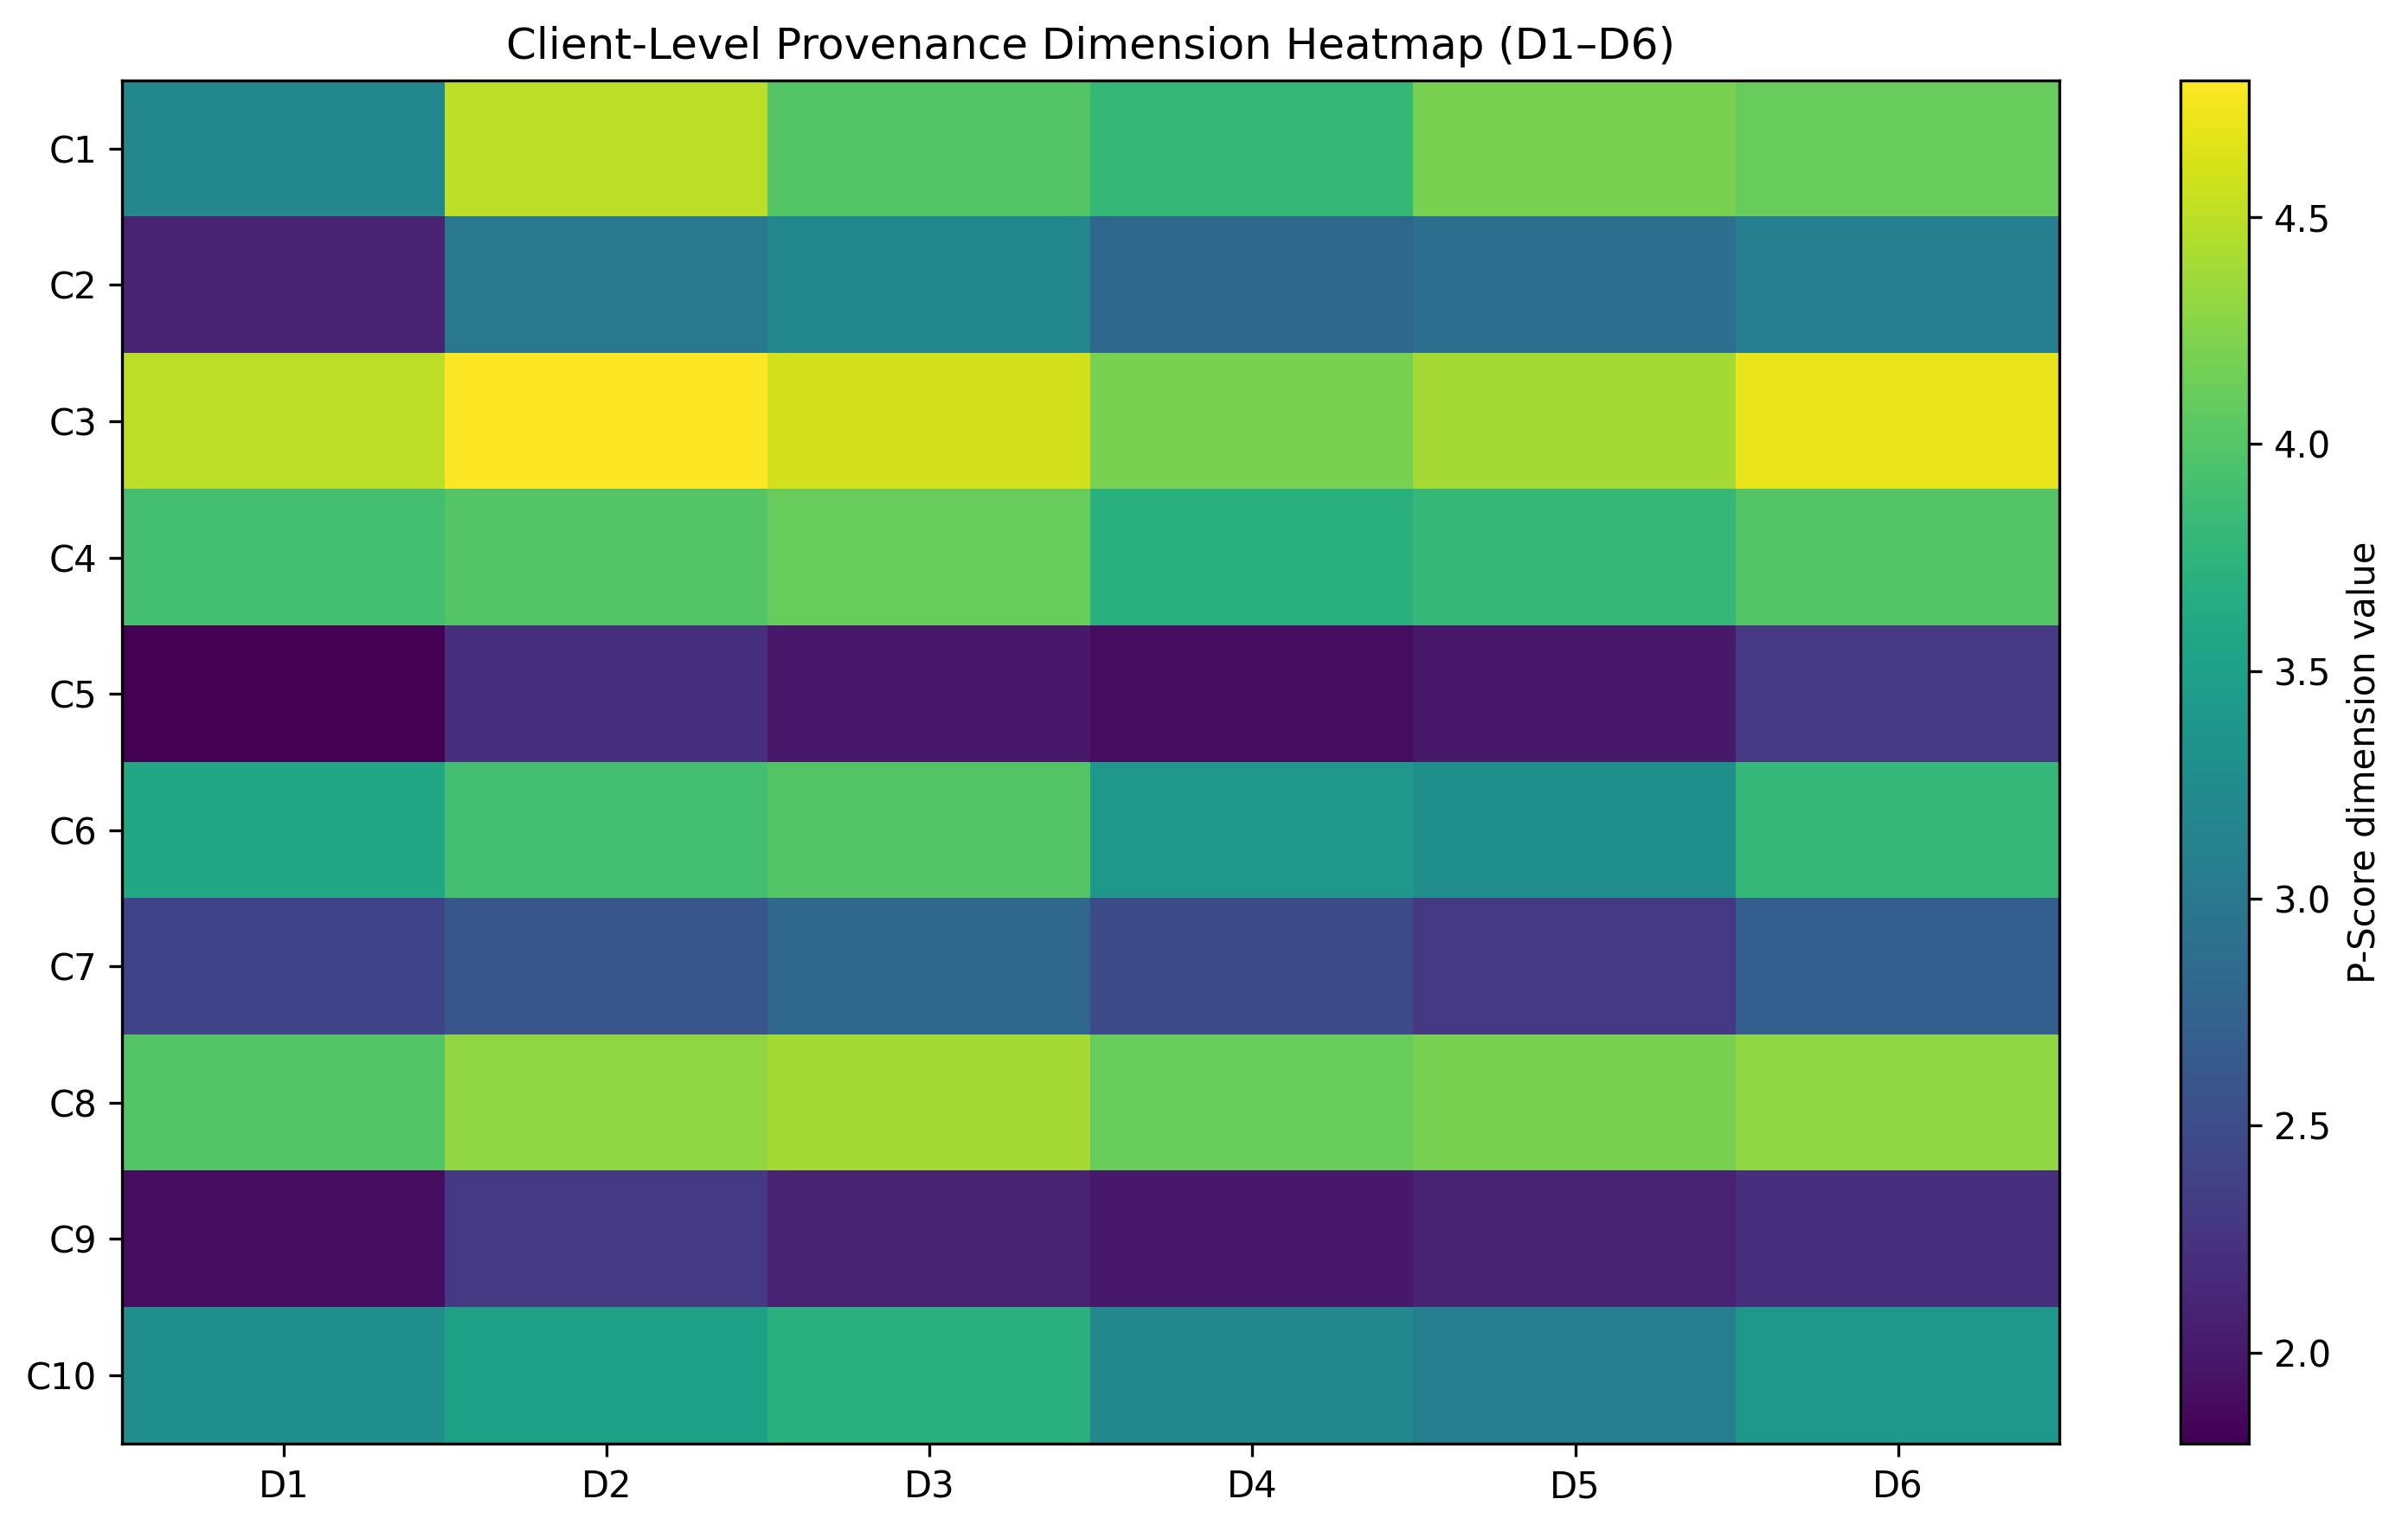

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example provenance scores — replace with your real table
# Rows = clients, Columns = D1–D6
dimensions = ["D1","D2","D3","D4","D5","D6"]
clients = [f"C{i}" for i in range(1,11)]

pscore_matrix = np.array([
    [3.2,4.5,4.0,3.8,4.2,4.1],
    [2.1,3.0,3.2,2.8,2.9,3.1],
    [4.5,4.8,4.6,4.2,4.4,4.7],
    [3.9,4.0,4.1,3.7,3.8,4.0],
    [1.8,2.2,2.0,1.9,2.0,2.3],
    [3.6,3.9,4.0,3.4,3.3,3.8],
    [2.4,2.6,2.8,2.5,2.3,2.7],
    [4.0,4.3,4.4,4.1,4.2,4.3],
    [1.9,2.3,2.1,2.0,2.1,2.2],
    [3.3,3.5,3.7,3.2,3.1,3.4]
])

plt.figure(figsize=(10,6))
plt.imshow(pscore_matrix, cmap="viridis", aspect="auto")
plt.colorbar(label="P-Score dimension value")
plt.xticks(np.arange(len(dimensions)), dimensions)
plt.yticks(np.arange(len(clients)), clients)
plt.title("Client-Level Provenance Dimension Heatmap (D1–D6)")
plt.tight_layout()
plt.savefig("pscore_heatmap.png", dpi=600)
plt.show()
